# BHANU PRATAP REDDY - 04/10/2022

### Library Imports and QoL Settings

In [1]:
#Importing all necessary Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pnx
import scipy.stats as stats
from sklearn.impute import SimpleImputer

#Clustering Required Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#PCA Required Libraries
from factor_analyzer import FactorAnalyzer
from sci_analysis import analyze
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.decomposition import PCA
#from yellowbrick.features import PCA
from matplotlib.patches import Rectangle
from factor_analyzer.factor_analyzer import calculate_kmo

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
%matplotlib inline

#Set the max number of rows in output cell to 30
pd.options.display.max_rows = 30


#Ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")

## Clustering

In [2]:
Clust_df = pd.read_excel("Clustering+Clean+Ads_Data.xlsx")
Clust_df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-18       Format1          300        250    75000  Inter223   
2  2020-9-3-16       Format6          336        250    84000  Inter217   
3   2020-9-3-2       Format1          300        250    75000  Inter224   
4  2020-9-3-13       Format1          300        250    75000  Inter225   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      Web      Mobile  Display                   1979              384   
2      Web     Desktop    Video                   1566              298   
3      Web     Desktop  Display                    643              103   
4    Video      Mobile  Display                   1550              347   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          380       0    0.0  0.35      0.0  0.0000  0.0  NaN  
2          297       0    0.0  0.35      0.0  0.0000  0.0  NaN  
3          102       0    0.0  0.35      0.0  0.0000  0.0  NaN  
4          345       0    0.0  0.35      0.0  0.0000  0.0  NaN

In [3]:
Clust_df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
25852   2020-10-1-5       Format5          720        300   216000  Inter222   
25853  2020-11-18-2       Format4          120        600    72000  inter230   
25854   2020-9-14-0       Format5          720        300   216000  Inter221   
25855   2020-9-30-4       Format7          300        600   180000  Inter228   
25856  2020-10-17-3       Format5          720        300   216000  Inter225   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
25852    Video     Desktop    Video                      1                1   
25853    Video      Mobile    Video                      7                1   
25854      App      Mobile    Video                      2                2   
25855    Video      Mobile  Display                      1                1   
25856    Video      Mobile  Display                      1                1   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
25852            1       0   0.01  0.35   0.0065  NaN  NaN  NaN  
25853            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
25854            2       1   0.09  0.35   0.0585  NaN  NaN  NaN  
25855            1       0   0.01  0.35   0.0065  NaN  NaN  NaN  
25856            1       0   0.01  0.35   0.0065  NaN  NaN  NaN

### Data Dictionary

**Timestamp** : Date on which the ad was run

**InventoryType** : Ad Format Label

**Ad - Length** : Length of the Ad Block

**Ad- Width** : Width of the ad block.

**Ad Size** : Total pixel area of the ad block

**Ad Type** : Ad Type Label

**Platform** : The platform on which the particular Ad is being run on.

**Device Type** : The targetted device type user.

**Format** : Format of the run ad

**Available_Impressions** : Max Potential number of impressions

**Matched_Queries** : Exact keyword Matches

**Impressions** : Actual recorded Impressions

**Clicks** : Clicks on Particular Ad

**Fee** : Fee on the Ad

**Revenue** : Revenue Generated by the Ad

**CTR** : CTR stands for click-through rate: a metric that measures the number of clicks advertisers receive on their ads per number of impressions.

**CPM** : CPM stands for "cost per 1000 impressions." Advertisers running CPM ads set their desired price per 1000 ads served and pay each time their ad appears.

**CPC** : Cost-per-click (CPC) bidding means that you pay for each click on your ads

### Clustering Analysis

In [4]:
Clust_df.shape

(25857, 19)

In [5]:
#The size of the dataset is:
print(f"No. of Rows: {Clust_df.shape[0]}")
print(f"No. of Columns: {Clust_df.shape[1]}")

No. of Rows: 25857
No. of Columns: 19


In [6]:
Clust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [7]:
Clust_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

In [8]:
Clust_df.duplicated().value_counts()

False    25857
dtype: int64

In [9]:
Clust_df.describe().T

count          mean           std       min  \
Ad - Length            25857.0  3.904312e+02  2.306961e+02    120.00   
Ad- Width              25857.0  3.321828e+02  1.942609e+02     70.00   
Ad Size                25857.0  9.968328e+04  6.264069e+04  33600.00   
Available_Impressions  25857.0  2.169621e+06  4.542680e+06      0.00   
Matched_Queries        25857.0  1.155322e+06  2.407244e+06      0.00   
Impressions            25857.0  1.107525e+06  2.326648e+06      0.00   
Clicks                 25857.0  9.525881e+03  1.672169e+04      0.00   
Spend                  25857.0  2.414473e+03  3.932835e+03      0.00   
Fee                    25857.0  3.367289e-01  3.053978e-02      0.21   
Revenue                25857.0  1.716549e+03  2.993025e+03      0.00   
CTR                    19392.0  6.962653e-02  7.497012e-02      0.00   
CPM                    19392.0  7.252900e+00  6.538314e+00      0.00   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.00   

                              25%          50%           75%          max  
Ad - Length              120.0000     300.0000  7.200000e+02       728.00  
Ad- Width                250.0000     300.0000  6.000000e+02       600.00  
Ad Size                72000.0000   75000.0000  8.400000e+04    216000.00  
Available_Impressions   9133.0000  330968.0000  2.208484e+06  27592861.00  
Matched_Queries         5451.0000  189449.0000  1.008171e+06  14702025.00  
Impressions             2558.0000  162162.0000  9.496930e+05  14194774.00  
Clicks                   305.0000    3457.0000  1.068100e+04    143049.00  
Spend                     36.0300    1173.6600  2.692280e+03     26931.87  
Fee                        0.3500       0.3500  3.500000e-01         0.35  
Revenue                   23.4200     762.8800  1.749982e+03     21276.18  
CTR                        0.0024       0.0077  1.283000e-01         1.00  
CPM                        1.6300       3.0350  1.222000e+01        81.56  
CPC                        0.0900       0.1600  5.700000e-01         7.26

In [10]:
Clust_df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [11]:
Clust_df["CPM"] = np.where(np.isnan(Clust_df["CPM"])&(Clust_df["Impressions"]==0),0,Clust_df["CPM"])
Clust_df["CPM"] = np.where(np.isnan(Clust_df["CPM"]),round((Clust_df["Spend"]/Clust_df["Impressions"])*1000,2),Clust_df["CPM"])

In [12]:
Clust_df["CPC"] = np.where(np.isnan(Clust_df["CPC"])&(Clust_df["Clicks"]==0),0,Clust_df["CPC"])
Clust_df["CPC"] = np.where(np.isnan(Clust_df["CPC"]),round((Clust_df["Spend"]/Clust_df["Clicks"]),2),Clust_df["CPC"])

In [13]:
Clust_df["CTR"] = np.where(np.isnan(Clust_df["CTR"])&(Clust_df["Impressions"]==0),0,Clust_df["CTR"])
Clust_df["CTR"] = np.where(np.isnan(Clust_df["CTR"]),round((Clust_df["Clicks"]/Clust_df["Impressions"]),2),Clust_df["CTR"])

In [14]:
Clust_df.head(20)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0   2020-9-2-17       Format1          300        250    75000  Inter222   
1   2020-9-2-18       Format1          300        250    75000  Inter223   
2   2020-9-3-16       Format6          336        250    84000  Inter217   
3    2020-9-3-2       Format1          300        250    75000  Inter224   
4   2020-9-3-13       Format1          300        250    75000  Inter225   
5   2020-9-2-22       Format1          300        250    75000  Inter226   
6    2020-9-3-3       Format1          300        250    75000  Inter227   
7    2020-9-2-0       Format1          300        250    75000  Inter224   
8    2020-9-2-9       Format1          300        250    75000  Inter225   
9    2020-9-2-6       Format1          300        250    75000  Inter226   
10  2020-9-2-10       Format1          300        250    75000  Inter227   
11  2020-9-1-23       Format1          300        250    75000  Inter228   
12  2020-9-2-15       Format6          336        250    84000  Inter218   
13   2020-9-2-5       Format6          336        250    84000  Inter219   
14   2020-9-2-7       Format1          300        250    75000  inter230   
15   2020-9-3-9       Format5          720        300   216000  Inter228   
16  2020-9-1-18       Format7          300        600   180000  Inter218   
17   2020-9-2-1       Format7          300        600   180000  Inter220   
18   2020-9-2-4       Format7          300        600   180000  Inter221   
19  2020-9-1-17       Format7          300        600   180000  Inter222   

   Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0     Video     Desktop  Display                   1806              325   
1       Web      Mobile  Display                   1979              384   
2       Web     Desktop    Video                   1566              298   
3       Web     Desktop  Display                    643              103   
4     Video      Mobile  Display                   1550              347   
5       Web      Mobile    Video                   2641              493   
6       App      Mobile  Display                    469              104   
7       Web     Desktop    Video                   1244              154   
8     Video      Mobile    Video                   1961              287   
9       Web      Mobile  Display                   1670              223   
10      App      Mobile    Video                   1780              285   
11    Video      Mobile    Video                   1911              336   
12      App      Mobile  Display                   1617              243   
13    Video     Desktop    Video                    677              106   
14    Video      Mobile    Video                   2187              278   
15    Video      Mobile    Video                      2                0   
16      App      Mobile  Display                   1987              325   
17      Web      Mobile  Display                   1013               89   
18      App      Mobile    Video                    406               80   
19    Video     Desktop  Display                   2375              434   

    Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0           323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1           380       0    0.0  0.35      0.0  0.0000  0.0  0.0  
2           297       0    0.0  0.35      0.0  0.0000  0.0  0.0  
3           102       0    0.0  0.35      0.0  0.0000  0.0  0.0  
4           345       0    0.0  0.35      0.0  0.0000  0.0  0.0  
5           491       0    0.0  0.35      0.0  0.0000  0.0  0.0  
6           103       0    0.0  0.35      0.0  0.0000  0.0  0.0  
7           153       0    0.0  0.35      0.0  0.0000  0.0  0.0  
8           287       0    0.0  0.35      0.0  0.0000  0.0  0.0  
9           223       0    0.0  0.35      0.0  0.0000  0.0  0.0  
10          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
11          334     

In [15]:
Clust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [16]:
Clust_df.describe().T.round(2)

count        mean         std       min       25%  \
Ad - Length            25857.0      390.43      230.70    120.00    120.00   
Ad- Width              25857.0      332.18      194.26     70.00    250.00   
Ad Size                25857.0    99683.28    62640.69  33600.00  72000.00   
Available_Impressions  25857.0  2169620.83  4542680.20      0.00   9133.00   
Matched_Queries        25857.0  1155321.80  2407243.93      0.00   5451.00   
Impressions            25857.0  1107525.30  2326647.65      0.00   2558.00   
Clicks                 25857.0     9525.88    16721.69      0.00    305.00   
Spend                  25857.0     2414.47     3932.84      0.00     36.03   
Fee                    25857.0        0.34        0.03      0.21      0.35   
Revenue                25857.0     1716.55     2993.03      0.00     23.42   
CTR                    25857.0        0.07        0.09      0.00      0.00   
CPM                    25857.0        7.52        8.93      0.00      1.57   
CPC                    25857.0        0.30        0.34      0.00      0.08   

                             50%         75%          max  
Ad - Length               300.00      720.00       728.00  
Ad- Width                 300.00      600.00       600.00  
Ad Size                 75000.00    84000.00    216000.00  
Available_Impressions  330968.00  2208484.00  27592861.00  
Matched_Queries        189449.00  1008171.00  14702025.00  
Impressions            162162.00   949693.00  14194774.00  
Clicks                   3457.00    10681.00    143049.00  
Spend                    1173.66     2692.28     26931.87  
Fee                         0.35        0.35         0.35  
Revenue                   762.88     1749.98     21276.18  
CTR                         0.01        0.13         2.00  
CPM                         2.96       12.45       715.00  
CPC                         0.12        0.50         7.26

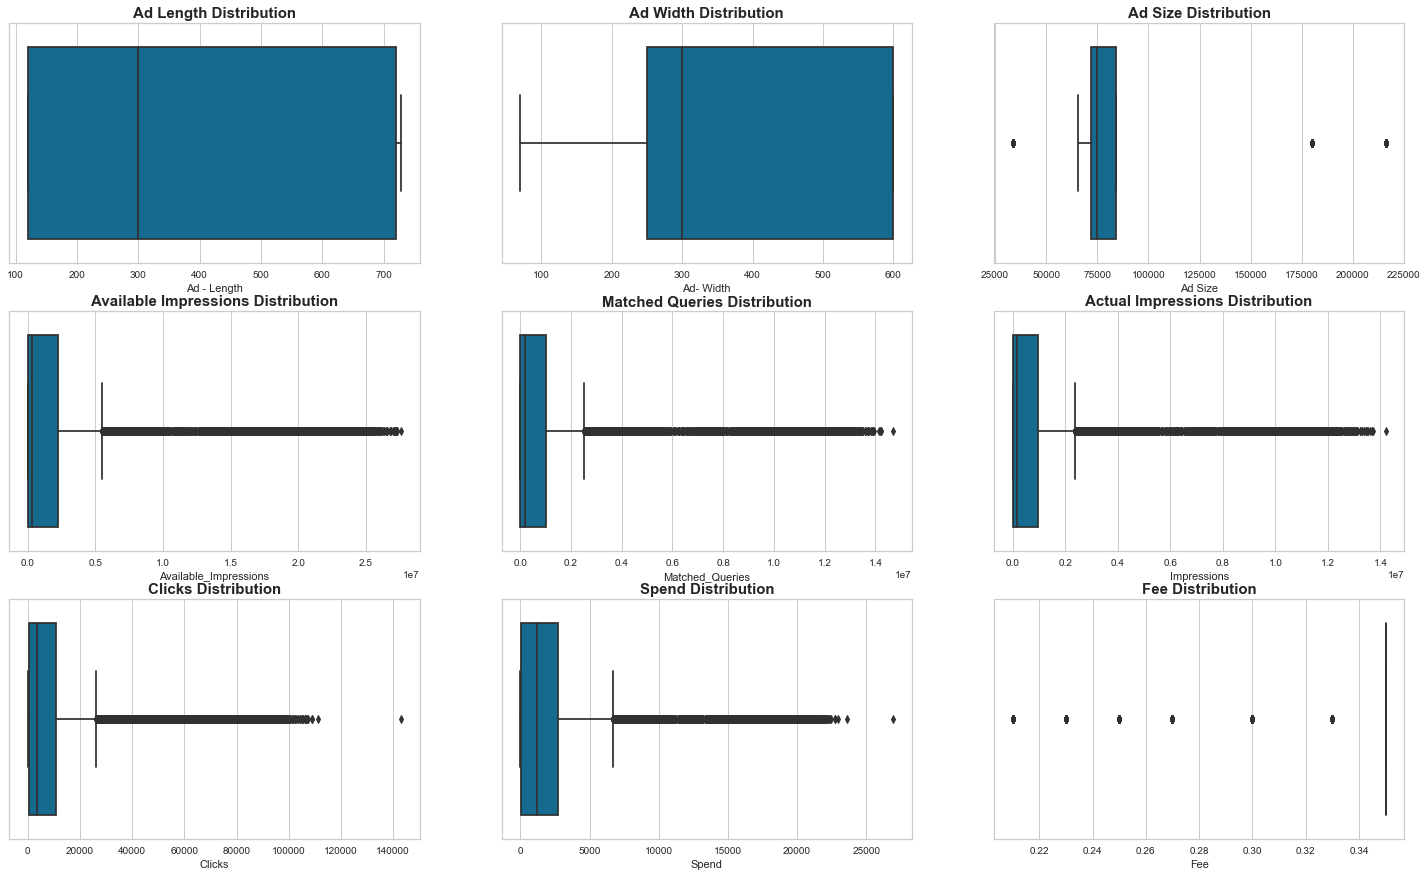

In [17]:
## Checking the distribution -  Visualising through plots - option -1
plt.figure(figsize =(25,15));
plt.subplot(3,3,1); ## Row - Column - Order
plt.title("Ad Length Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Ad - Length");

plt.subplot(3,3,2); ## Row - Column - Order
plt.title("Ad Width Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Ad- Width");

plt.subplot(3,3,3); ## Row - Column - Order
plt.title("Ad Size Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Ad Size");

plt.subplot(3,3,4); ## Row - Column - Order
plt.title("Available Impressions Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Available_Impressions");

plt.subplot(3,3,5); ## Row - Column - Order
plt.title("Matched Queries Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Matched_Queries");

plt.subplot(3,3,6); ## Row - Column - Order
plt.title("Actual Impressions Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Impressions");

plt.subplot(3,3,7); ## Row - Column - Order
plt.title("Clicks Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Clicks");

plt.subplot(3,3,8); ## Row - Column - Order
plt.title("Spend Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Spend");

plt.subplot(3,3,9); ## Row - Column - Order
plt.title("Fee Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Fee");

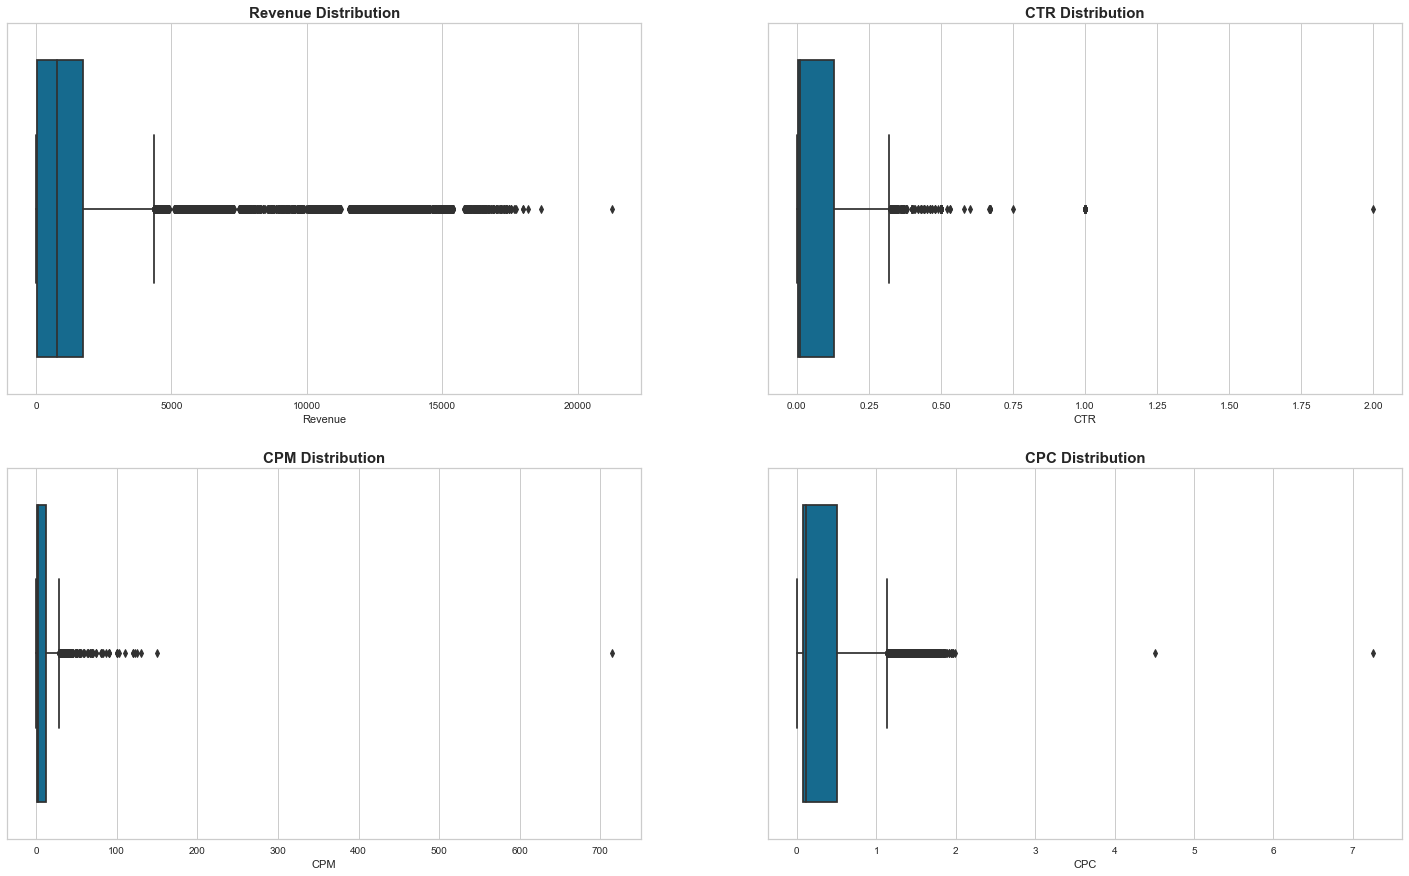

In [18]:
plt.figure(figsize =(25,15));
plt.subplot(2,2,1); ## Row - Column - Order
plt.title("Revenue Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Revenue");

plt.subplot(2,2,2); ## Row - Column - Order
plt.title("CTR Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="CTR");

plt.subplot(2,2,3); ## Row - Column - Order
plt.title("CPM Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="CPM");

plt.subplot(2,2,4); ## Row - Column - Order
plt.title("CPC Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="CPC");

In [19]:
def outlier_treatment(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
#Ad Size Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["Ad Size"])

Clust_df['Ad Size']=np.where(Clust_df['Ad Size']>Ur,Ur,Clust_df['Ad Size'])
Clust_df['Ad Size']=np.where(Clust_df['Ad Size']<Lr,Lr,Clust_df['Ad Size'])

#Available_Impressions Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["Available_Impressions"])

Clust_df['Available_Impressions']=np.where(Clust_df['Available_Impressions']>Ur,Ur,Clust_df['Available_Impressions'])
Clust_df['Available_Impressions']=np.where(Clust_df['Available_Impressions']<Lr,Lr,Clust_df['Available_Impressions'])

#Matched_Queries Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["Matched_Queries"])

Clust_df['Matched_Queries']=np.where(Clust_df['Matched_Queries']>Ur,Ur,Clust_df['Matched_Queries'])
Clust_df['Matched_Queries']=np.where(Clust_df['Matched_Queries']<Lr,Lr,Clust_df['Matched_Queries'])

#Actual Impressions Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["Impressions"])

Clust_df['Impressions']=np.where(Clust_df['Impressions']>Ur,Ur,Clust_df['Impressions'])
Clust_df['Impressions']=np.where(Clust_df['Impressions']<Lr,Lr,Clust_df['Impressions'])

#Clicks Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["Clicks"])

Clust_df['Clicks']=np.where(Clust_df['Clicks']>Ur,Ur,Clust_df['Clicks'])
Clust_df['Clicks']=np.where(Clust_df['Clicks']<Lr,Lr,Clust_df['Clicks'])

#Spend Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["Spend"])

Clust_df['Spend']=np.where(Clust_df['Spend']>Ur,Ur,Clust_df['Spend'])
Clust_df['Spend']=np.where(Clust_df['Spend']<Lr,Lr,Clust_df['Spend'])

#Fee Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["Fee"])

Clust_df['Fee']=np.where(Clust_df['Fee']>Ur,Ur,Clust_df['Fee'])
Clust_df['Fee']=np.where(Clust_df['Fee']<Lr,Lr,Clust_df['Fee'])

#Revenue Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["Revenue"])

Clust_df['Revenue']=np.where(Clust_df['Revenue']>Ur,Ur,Clust_df['Revenue'])
Clust_df['Revenue']=np.where(Clust_df['Revenue']<Lr,Lr,Clust_df['Revenue'])

#CTR Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["CTR"])

Clust_df['CTR']=np.where(Clust_df['CTR']>Ur,Ur,Clust_df['CTR'])
Clust_df['CTR']=np.where(Clust_df['CTR']<Lr,Lr,Clust_df['CTR'])

#CPM Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["CPM"])

Clust_df['CPM']=np.where(Clust_df['CPM']>Ur,Ur,Clust_df['CPM'])
Clust_df['CPM']=np.where(Clust_df['CPM']<Lr,Lr,Clust_df['CPM'])

#CPC Outlier Treatment
Lr, Ur = outlier_treatment(Clust_df["CPC"])

Clust_df['CPC']=np.where(Clust_df['CPC']>Ur,Ur,Clust_df['CPC'])
Clust_df['CPC']=np.where(Clust_df['CPC']<Lr,Lr,Clust_df['CPC'])

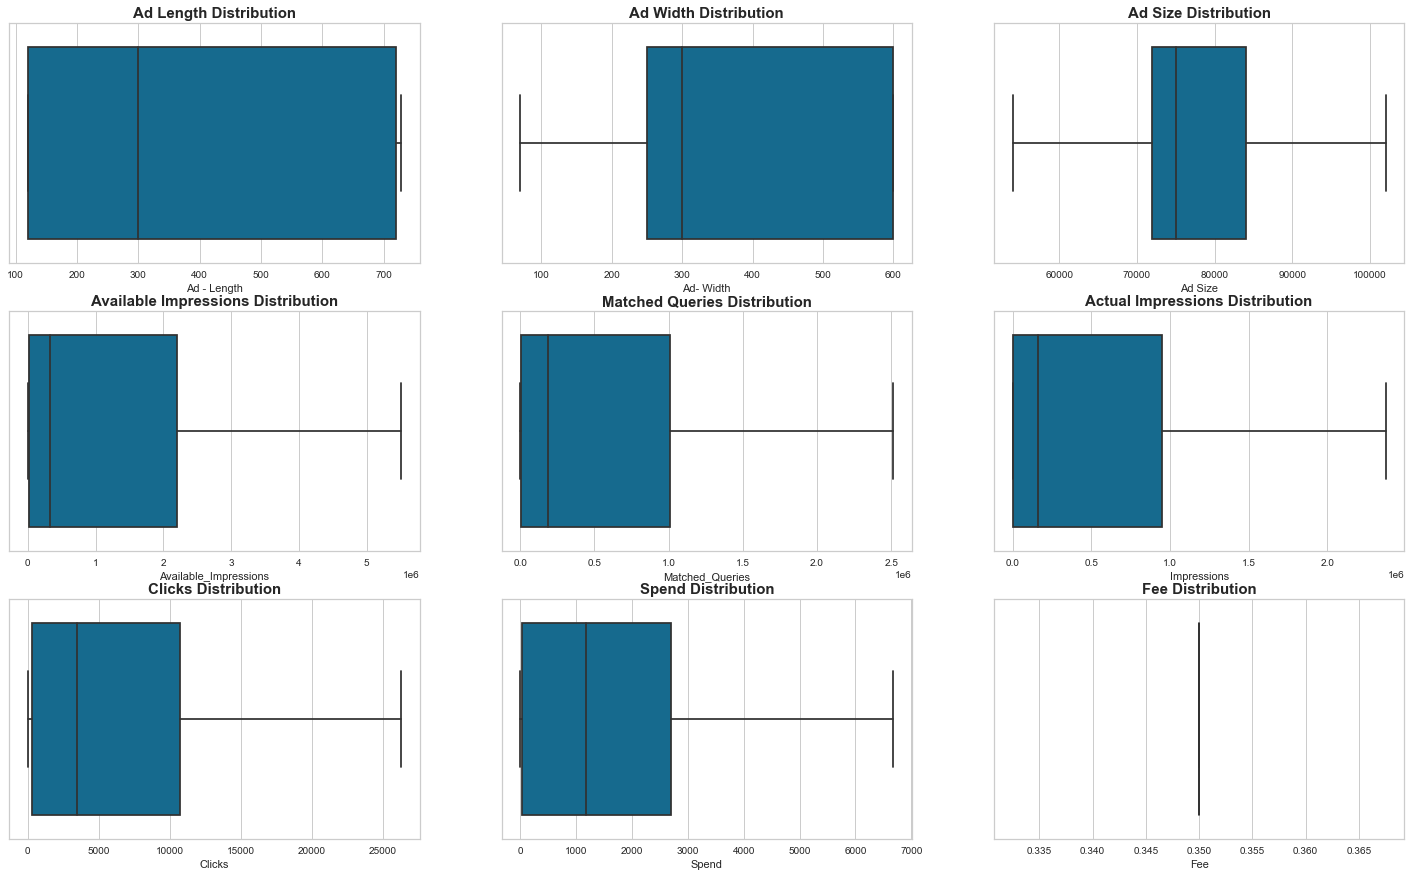

In [21]:
## Checking the distribution -  Visualising through plots - option -1
plt.figure(figsize =(25,15));
plt.subplot(3,3,1); ## Row - Column - Order
plt.title("Ad Length Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Ad - Length");

plt.subplot(3,3,2); ## Row - Column - Order
plt.title("Ad Width Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Ad- Width");

plt.subplot(3,3,3); ## Row - Column - Order
plt.title("Ad Size Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Ad Size");

plt.subplot(3,3,4); ## Row - Column - Order
plt.title("Available Impressions Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Available_Impressions");

plt.subplot(3,3,5); ## Row - Column - Order
plt.title("Matched Queries Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Matched_Queries");

plt.subplot(3,3,6); ## Row - Column - Order
plt.title("Actual Impressions Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Impressions");

plt.subplot(3,3,7); ## Row - Column - Order
plt.title("Clicks Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Clicks");

plt.subplot(3,3,8); ## Row - Column - Order
plt.title("Spend Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Spend");

plt.subplot(3,3,9); ## Row - Column - Order
plt.title("Fee Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Fee");

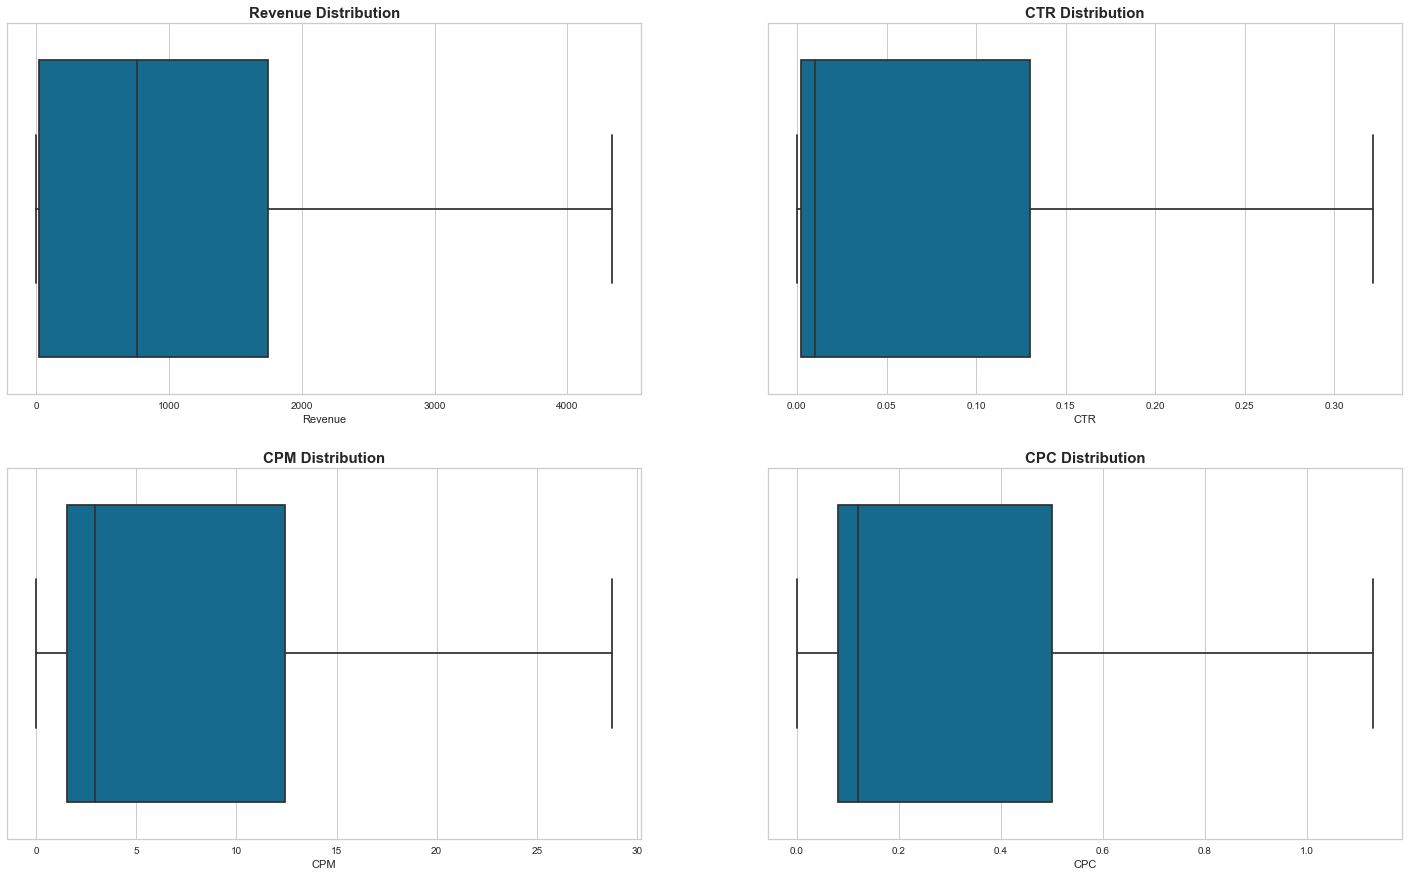

In [22]:
plt.figure(figsize =(25,15));
plt.subplot(2,2,1); ## Row - Column - Order
plt.title("Revenue Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="Revenue");

plt.subplot(2,2,2); ## Row - Column - Order
plt.title("CTR Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="CTR");

plt.subplot(2,2,3); ## Row - Column - Order
plt.title("CPM Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="CPM");

plt.subplot(2,2,4); ## Row - Column - Order
plt.title("CPC Distribution",fontsize=15, weight="bold")
sns.boxplot(data=Clust_df,x="CPC");

In [23]:
Clust_df.describe().T.round(2)

count        mean         std       min       25%  \
Ad - Length            25857.0      390.43      230.70    120.00    120.00   
Ad- Width              25857.0      332.18      194.26     70.00    250.00   
Ad Size                25857.0    77484.14    15352.88  54000.00  72000.00   
Available_Impressions  25857.0  1357917.55  1896821.01      0.00   9133.00   
Matched_Queries        25857.0   659959.32   885651.39      0.00   5451.00   
Impressions            25857.0   619864.63   842872.33      0.00   2558.00   
Clicks                 25857.0     7070.83     8602.09      0.00    305.00   
Spend                  25857.0     1844.35     2184.31      0.00     36.03   
Fee                    25857.0        0.35        0.00      0.35      0.35   
Revenue                25857.0     1216.79     1446.34      0.00     23.42   
CTR                    25857.0        0.07        0.08      0.00      0.00   
CPM                    25857.0        7.36        6.93      0.00      1.57   
CPC                    25857.0        0.29        0.31      0.00      0.08   

                             50%         75%         max  
Ad - Length               300.00      720.00      728.00  
Ad- Width                 300.00      600.00      600.00  
Ad Size                 75000.00    84000.00   102000.00  
Available_Impressions  330968.00  2208484.00  5507510.50  
Matched_Queries        189449.00  1008171.00  2512251.00  
Impressions            162162.00   949693.00  2370395.50  
Clicks                   3457.00    10681.00    26245.00  
Spend                    1173.66     2692.28     6676.66  
Fee                         0.35        0.35        0.35  
Revenue                   762.88     1749.98     4339.83  
CTR                         0.01        0.13        0.32  
CPM                         2.96       12.45       28.77  
CPC                         0.12        0.50        1.13

In [24]:
Clust_num_data_df = Clust_df[["Ad - Length","Ad- Width","Ad Size","Available_Impressions","Matched_Queries","Impressions","Clicks","Spend","Fee","Revenue","CTR","CPM","CPC"]]
Clust_num_data_df.head(20)

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0           300        250   75000.0                 1806.0            325.0   
1           300        250   75000.0                 1979.0            384.0   
2           336        250   84000.0                 1566.0            298.0   
3           300        250   75000.0                  643.0            103.0   
4           300        250   75000.0                 1550.0            347.0   
5           300        250   75000.0                 2641.0            493.0   
6           300        250   75000.0                  469.0            104.0   
7           300        250   75000.0                 1244.0            154.0   
8           300        250   75000.0                 1961.0            287.0   
9           300        250   75000.0                 1670.0            223.0   
10          300        250   75000.0                 1780.0            285.0   
11          300        250   75000.0                 1911.0            336.0   
12          336        250   84000.0                 1617.0            243.0   
13          336        250   84000.0                  677.0            106.0   
14          300        250   75000.0                 2187.0            278.0   
15          720        300  102000.0                    2.0              0.0   
16          300        600  102000.0                 1987.0            325.0   
17          300        600  102000.0                 1013.0             89.0   
18          300        600  102000.0                  406.0             80.0   
19          300        600  102000.0                 2375.0            434.0   

    Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0         323.0     1.0    0.0  0.35      0.0  0.0031  0.0  0.0  
1         380.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
2         297.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
3         102.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
4         345.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
5         491.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
6         103.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
7         153.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
8         287.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
9         223.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
10        285.0     1.0    0.0  0.35      0.0  0.0035  0.0  0.0  
11        334.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
12        242.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
13        106.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
14        278.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
15          0.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
16        324.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
17         89.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
18         79.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0  
19        428.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0

In [25]:
Clust_scaled_z_df = Clust_num_data_df.apply(zscore)
Clust_scaled_z_df["Fee"] = 0

Clust_scaled_z_df.head(20)

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0     -0.392000  -0.423062 -0.161806              -0.714953        -0.744816   
1     -0.392000  -0.423062 -0.161806              -0.714862        -0.744749   
2     -0.235948  -0.423062  0.424415              -0.715079        -0.744846   
3     -0.392000  -0.423062 -0.161806              -0.715566        -0.745066   
4     -0.392000  -0.423062 -0.161806              -0.715088        -0.744791   
5     -0.392000  -0.423062 -0.161806              -0.714513        -0.744626   
6     -0.392000  -0.423062 -0.161806              -0.715658        -0.745065   
7     -0.392000  -0.423062 -0.161806              -0.715249        -0.745009   
8     -0.392000  -0.423062 -0.161806              -0.714871        -0.744859   
9     -0.392000  -0.423062 -0.161806              -0.715025        -0.744931   
10    -0.392000  -0.423062 -0.161806              -0.714967        -0.744861   
11    -0.392000  -0.423062 -0.161806              -0.714898        -0.744803   
12    -0.235948  -0.423062  0.424415              -0.715053        -0.744908   
13    -0.235948  -0.423062  0.424415              -0.715548        -0.745063   
14    -0.392000  -0.423062 -0.161806              -0.714752        -0.744869   
15     1.428612  -0.165671  1.596856              -0.715904        -0.745183   
16    -0.392000   1.378674  1.596856              -0.714858        -0.744816   
17    -0.392000   1.378674  1.596856              -0.715371        -0.745082   
18    -0.392000   1.378674  1.596856              -0.715691        -0.745092   
19    -0.392000   1.378674  1.596856              -0.714653        -0.744693   

    Impressions    Clicks     Spend  Fee   Revenue       CTR      CPM  \
0     -0.735050 -0.821889 -0.844382    0 -0.841307 -0.856650 -1.06137   
1     -0.734983 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
2     -0.735081 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
3     -0.735313 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
4     -0.735024 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
5     -0.734851 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
6     -0.735311 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
7     -0.735252 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
8     -0.735093 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
9     -0.735169 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
10    -0.735095 -0.821889 -0.844382    0 -0.841307 -0.851756 -1.06137   
11    -0.735037 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
12    -0.735146 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
13    -0.735308 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
14    -0.735104 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
15    -0.735434 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
16    -0.735049 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
17    -0.735328 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
18    -0.735340 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   
19    -0.734926 -0.822006 -0.844382    0 -0.841307 -0.894571 -1.06137   

         CPC  
0  -0.945073  
1  -0.945073  
2  -0.945073  
3  -0.945073  
4  -0.945073  
5  -0.945073  
6  -0.945073  
7  -0.945073  
8  -0.945073  
9  -0.945073  
10 -0.945073  
11 -0.945073  
12 -0.945073  
13 -0.945073  
14 -0.945073  
15 -0.945073  
16 -0.945073  
17 -0.945073  
18 -0.945073  
19 -0.945073

In [26]:
Clust_scaled_z_df.describe().T

count          mean       std       min       25%  \
Ad - Length            25857.0  1.361843e-14  1.000019 -1.172263 -1.172263   
Ad- Width              25857.0  1.313640e-14  1.000019 -1.349668 -0.423062   
Ad Size                25857.0  9.961410e-15  1.000019 -1.529654 -0.357213   
Available_Impressions  25857.0 -2.160377e-15  1.000019 -0.715905 -0.711090   
Matched_Queries        25857.0 -5.630549e-15  1.000019 -0.745183 -0.739028   
Impressions            25857.0  8.653831e-15  1.000019 -0.735434 -0.732399   
Clicks                 25857.0  1.118393e-14  1.000019 -0.822006 -0.786548   
Spend                  25857.0 -7.677941e-15  1.000019 -0.844382 -0.827887   
Fee                    25857.0  0.000000e+00  0.000000  0.000000  0.000000   
Revenue                25857.0  4.202798e-15  1.000019 -0.841307 -0.825114   
CTR                    25857.0 -5.212531e-15  1.000019 -0.894571 -0.867659   
CPM                    25857.0 -3.680683e-15  1.000019 -1.061370 -0.834843   
CPC                    25857.0 -1.745278e-14  1.000019 -0.945073 -0.685985   

                            50%       75%       max  
Ad - Length           -0.392000  1.428612  1.463290  
Ad- Width             -0.165671  1.378674  1.378674  
Ad Size               -0.161806  0.424415  1.596856  
Available_Impressions -0.541416  0.448425  2.187699  
Matched_Queries       -0.531269  0.393178  2.091486  
Impressions           -0.543038  0.391322  2.076904  
Clicks                -0.420119  0.419693  2.229056  
Spend                 -0.307057  0.388198  2.212324  
Fee                    0.000000  0.000000  0.000000  
Revenue               -0.313841  0.368655  2.159308  
CTR                   -0.772243  0.695691  3.040717  
CPM                   -0.634287  0.734978  3.089709  
CPC                   -0.556441  0.674227  2.714545

In [27]:
scalerm = StandardScaler()
Clust_S_scaled_df = pd.DataFrame(scalerm.fit_transform(Clust_num_data_df),columns=Clust_num_data_df.columns)
Clust_S_scaled_df.describe().T

count          mean       std       min       25%  \
Ad - Length            25857.0  1.361843e-14  1.000019 -1.172263 -1.172263   
Ad- Width              25857.0  1.313640e-14  1.000019 -1.349668 -0.423062   
Ad Size                25857.0  9.961410e-15  1.000019 -1.529654 -0.357213   
Available_Impressions  25857.0 -2.160377e-15  1.000019 -0.715905 -0.711090   
Matched_Queries        25857.0 -5.630549e-15  1.000019 -0.745183 -0.739028   
Impressions            25857.0  8.653831e-15  1.000019 -0.735434 -0.732399   
Clicks                 25857.0  1.118393e-14  1.000019 -0.822006 -0.786548   
Spend                  25857.0 -7.677941e-15  1.000019 -0.844382 -0.827887   
Fee                    25857.0  0.000000e+00  0.000000  0.000000  0.000000   
Revenue                25857.0  4.202798e-15  1.000019 -0.841307 -0.825114   
CTR                    25857.0 -5.212531e-15  1.000019 -0.894571 -0.867659   
CPM                    25857.0 -3.680683e-15  1.000019 -1.061370 -0.834843   
CPC                    25857.0 -1.745278e-14  1.000019 -0.945073 -0.685985   

                            50%       75%       max  
Ad - Length           -0.392000  1.428612  1.463290  
Ad- Width             -0.165671  1.378674  1.378674  
Ad Size               -0.161806  0.424415  1.596856  
Available_Impressions -0.541416  0.448425  2.187699  
Matched_Queries       -0.531269  0.393178  2.091486  
Impressions           -0.543038  0.391322  2.076904  
Clicks                -0.420119  0.419693  2.229056  
Spend                 -0.307057  0.388198  2.212324  
Fee                    0.000000  0.000000  0.000000  
Revenue               -0.313841  0.368655  2.159308  
CTR                   -0.772243  0.695691  3.040717  
CPM                   -0.634287  0.734978  3.089709  
CPC                   -0.556441  0.674227  2.714545

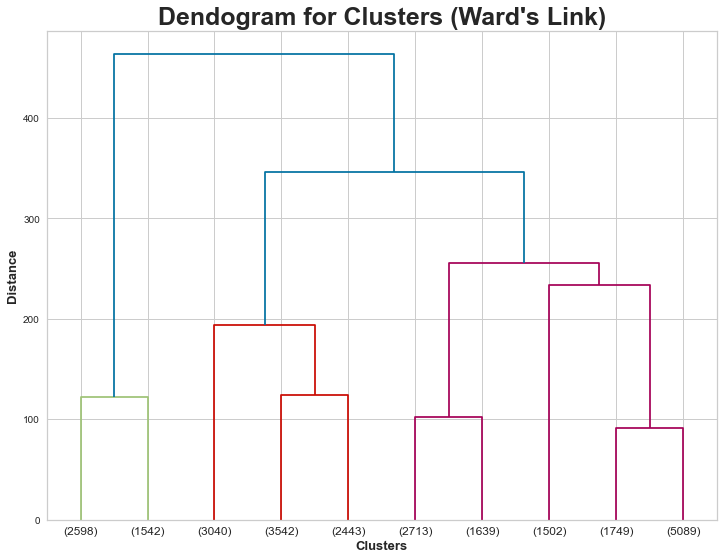

In [28]:
#Wardslink Dendogram
plt.figure(figsize=(12,9))
plt.title("Dendogram for Clusters (Ward's Link)",fontsize=25, weight="bold")

wardlink = linkage(Clust_S_scaled_df,method="ward",metric="euclidean")
dend = dendrogram(wardlink,truncate_mode="lastp",p=10)

plt.xlabel("Clusters",fontsize=13, weight="bold");
plt.ylabel("Distance",fontsize=13, weight="bold");

In [29]:
#Within Sum of Squares
wss=[]
for i in range(1,12):
    KM = KMeans(n_clusters=i,random_state=42)
    KM.fit(Clust_S_scaled_df)
    wss.append(KM.inertia_)
    
wss

[310283.99999999994,
 188852.54334674907,
 141540.65362038958,
 104872.69391476279,
 76114.4380822997,
 60038.389579520925,
 52163.44632597149,
 45639.442735661956,
 40249.78881457539,
 36312.087044515974,
 32757.38165778397]

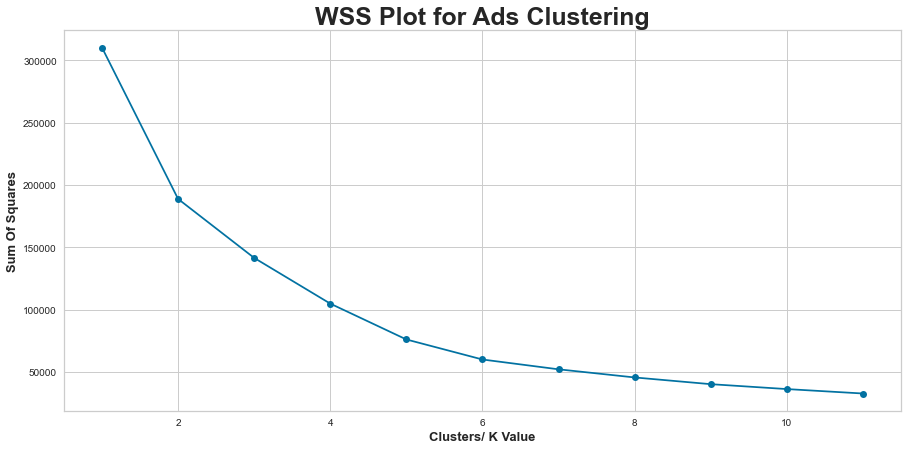

In [30]:
#WSS Plot
plt.figure(figsize=(15,7))
plt.title("WSS Plot for Ads Clustering",fontsize=25, weight="bold")

plt.plot(range(1,12), wss, 'o-');

plt.xlabel("Clusters/ K Value",fontsize=13, weight="bold");
plt.ylabel("Sum Of Squares",fontsize=13, weight="bold");

In [31]:
#Slihouette Scores
silhouette_scores = []

for k in range(2, 12):
    model_sil = KMeans(n_clusters=k,random_state=42)
    model_sil.fit(Clust_S_scaled_df)
    score = silhouette_score(Clust_S_scaled_df, model_sil.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.37880013646163846
Silhouette Score for k =  3 is 0.3466496747547733
Silhouette Score for k =  4 is 0.4222964796199141
Silhouette Score for k =  5 is 0.4801869379109477
Silhouette Score for k =  6 is 0.48793303029582497
Silhouette Score for k =  7 is 0.4897584186020886
Silhouette Score for k =  8 is 0.5102494711675123
Silhouette Score for k =  9 is 0.5009065321401819
Silhouette Score for k =  10 is 0.5218591438221627
Silhouette Score for k =  11 is 0.4922442726730517


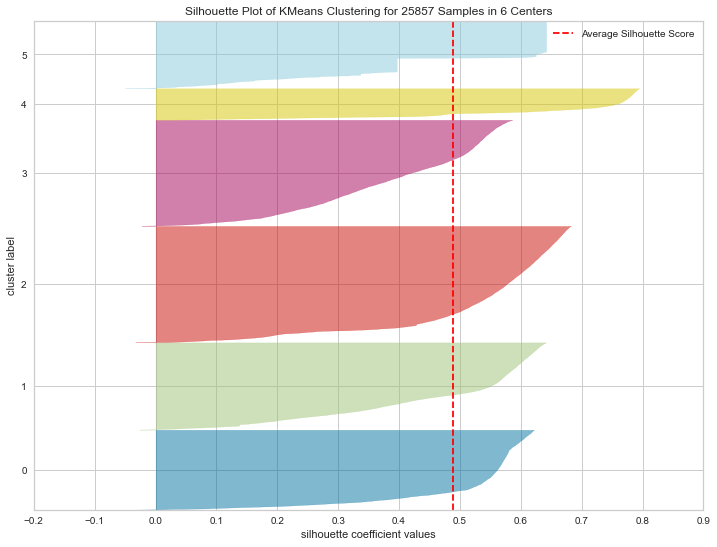

In [32]:
#k = 6 Seems to be the ideal value
plt.figure(figsize=(12,9))

k_means = KMeans(n_clusters = 6,random_state=42)
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')

visualizer.fit(Clust_S_scaled_df)        # Fit the data to the visualizer
visualizer.show();     # Finalize and render the figure

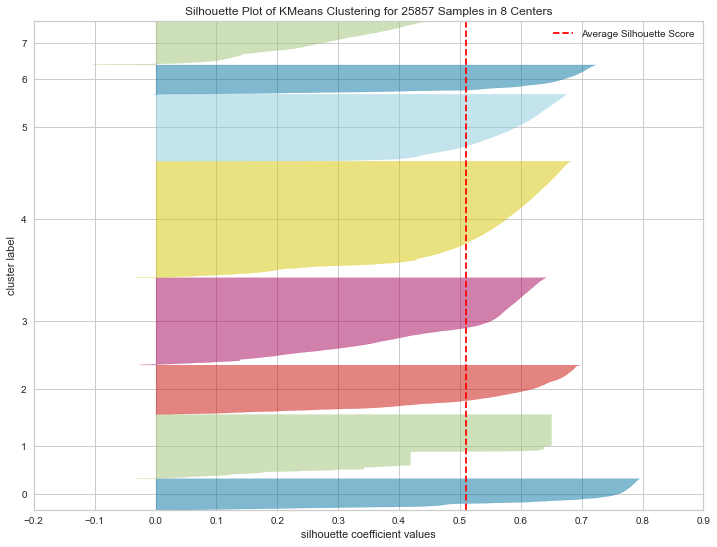

In [33]:
#k = 8 
plt.figure(figsize=(12,9))

k_means = KMeans(n_clusters = 8,random_state=42)
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')

visualizer.fit(Clust_S_scaled_df)        # Fit the data to the visualizer
visualizer.show();     # Finalize and render the figure

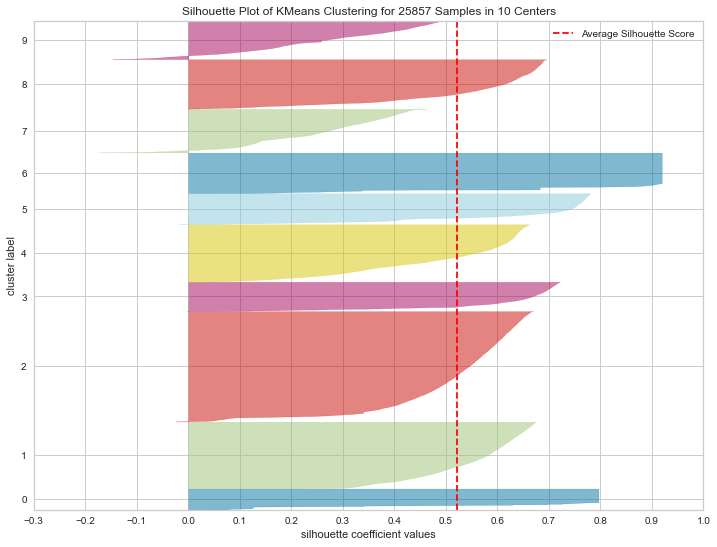

In [34]:
#k = 10 
plt.figure(figsize=(12,9))

k_means = KMeans(n_clusters = 10,random_state=42)
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')

visualizer.fit(Clust_S_scaled_df)        # Fit the data to the visualizer
visualizer.show();     # Finalize and render the figure

In [35]:
#Obtain Labels for k=6
k_means = KMeans(n_clusters = 6,random_state=42)
k_means.fit(Clust_S_scaled_df)
labels = k_means.labels_

Clust_df["Cluster_Label"] = labels
Clust_df.head(20)

Timestamp InventoryType  Ad - Length  Ad- Width   Ad Size   Ad Type  \
0   2020-9-2-17       Format1          300        250   75000.0  Inter222   
1   2020-9-2-18       Format1          300        250   75000.0  Inter223   
2   2020-9-3-16       Format6          336        250   84000.0  Inter217   
3    2020-9-3-2       Format1          300        250   75000.0  Inter224   
4   2020-9-3-13       Format1          300        250   75000.0  Inter225   
5   2020-9-2-22       Format1          300        250   75000.0  Inter226   
6    2020-9-3-3       Format1          300        250   75000.0  Inter227   
7    2020-9-2-0       Format1          300        250   75000.0  Inter224   
8    2020-9-2-9       Format1          300        250   75000.0  Inter225   
9    2020-9-2-6       Format1          300        250   75000.0  Inter226   
10  2020-9-2-10       Format1          300        250   75000.0  Inter227   
11  2020-9-1-23       Format1          300        250   75000.0  Inter228   
12  2020-9-2-15       Format6          336        250   84000.0  Inter218   
13   2020-9-2-5       Format6          336        250   84000.0  Inter219   
14   2020-9-2-7       Format1          300        250   75000.0  inter230   
15   2020-9-3-9       Format5          720        300  102000.0  Inter228   
16  2020-9-1-18       Format7          300        600  102000.0  Inter218   
17   2020-9-2-1       Format7          300        600  102000.0  Inter220   
18   2020-9-2-4       Format7          300        600  102000.0  Inter221   
19  2020-9-1-17       Format7          300        600  102000.0  Inter222   

   Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0     Video     Desktop  Display                 1806.0            325.0   
1       Web      Mobile  Display                 1979.0            384.0   
2       Web     Desktop    Video                 1566.0            298.0   
3       Web     Desktop  Display                  643.0            103.0   
4     Video      Mobile  Display                 1550.0            347.0   
5       Web      Mobile    Video                 2641.0            493.0   
6       App      Mobile  Display                  469.0            104.0   
7       Web     Desktop    Video                 1244.0            154.0   
8     Video      Mobile    Video                 1961.0            287.0   
9       Web      Mobile  Display                 1670.0            223.0   
10      App      Mobile    Video                 1780.0            285.0   
11    Video      Mobile    Video                 1911.0            336.0   
12      App      Mobile  Display                 1617.0            243.0   
13    Video     Desktop    Video                  677.0            106.0   
14    Video      Mobile    Video                 2187.0            278.0   
15    Video      Mobile    Video                    2.0              0.0   
16      App      Mobile  Display                 1987.0            325.0   
17      Web      Mobile  Display                 1013.0             89.0   
18      App      Mobile    Video                  406.0             80.0   
19    Video     Desktop  Display                 2375.0            434.0   

    Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  Cluster_Label  
0         323.0     1.0    0.0  0.35      0.0  0.0031  0.0  0.0              5  
1         380.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0              5  
2         297.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0              5  
3         102.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0              5  
4         345.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0              5  
5         491.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0              5  
6         103.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0              5  
7         153.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.0              5  
8         287.0     0.0    0.0  0.35      0.0  0.0000  0.0  0.

In [36]:
Clust_df.Cluster_Label.value_counts().sort_index()

0    4231
1    4620
2    6163
3    5613
4    1661
5    3569
Name: Cluster_Label, dtype: int64

In [37]:
main_clust_profile = Clust_df[["Ad - Length","Ad- Width","Ad Size","Available_Impressions","Matched_Queries","Impressions","Clicks","Spend","Revenue","CTR","CPM","CPC","Cluster_Label"]]


In [38]:
clust_profile = main_clust_profile.groupby("Cluster_Label").mean()
clust_profile['freq'] = Clust_df.Cluster_Label.value_counts().sort_index()
clust_profile.style.highlight_max(color="red")

In [39]:
clust_profile.style.highlight_min(color="blue")

In [40]:
main_clust_profile2 = Clust_df[["Ad - Length","Ad- Width","Ad Size","Available_Impressions","Matched_Queries","Impressions","Clicks","Spend","Revenue","CTR","CPM","CPC","Device Type","Cluster_Label"]]
clust_profile2 = main_clust_profile2.groupby(["Device Type","Cluster_Label"]).mean()
clust_profile2['freq'] = Clust_df[["Device Type","Cluster_Label"]].value_counts().sort_index()
clust_profile2.style.highlight_max(color="purple")

In [41]:
clust_profile2.style.highlight_min(color="Green")

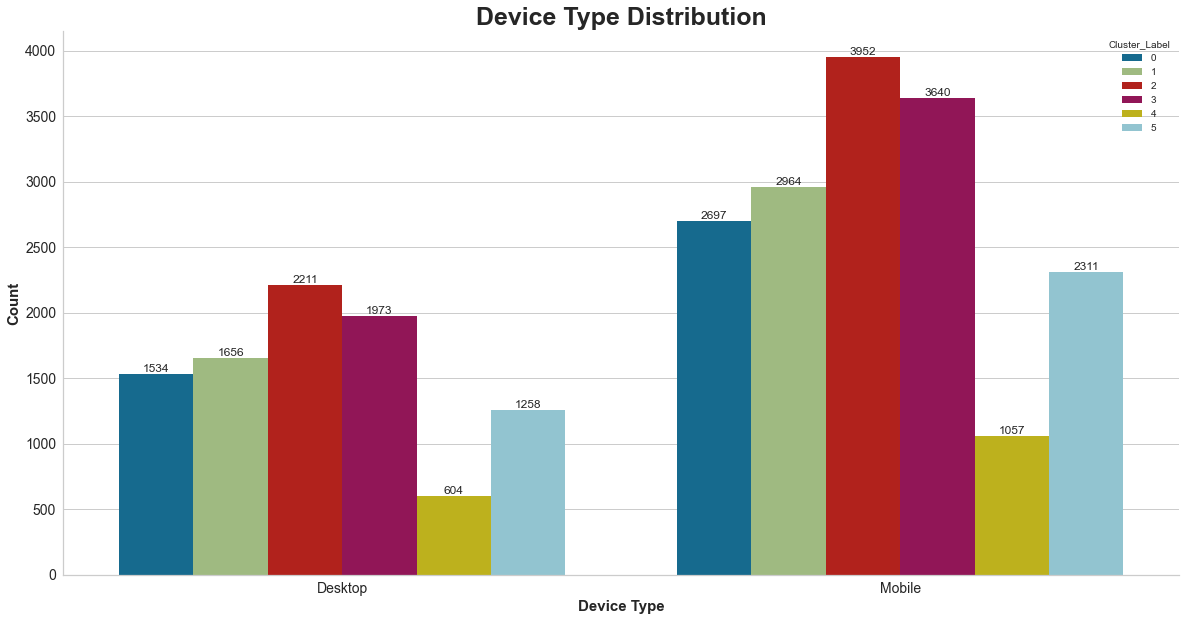

In [42]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Device Type Distribution",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()

#Plotting relevant graph using seaborn
ax = sns.countplot(data= Clust_df, hue="Cluster_Label", x= "Device Type");
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i],label_type="edge",fontsize= 12,rotation = 0);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0)
plt.xlabel("Device Type",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

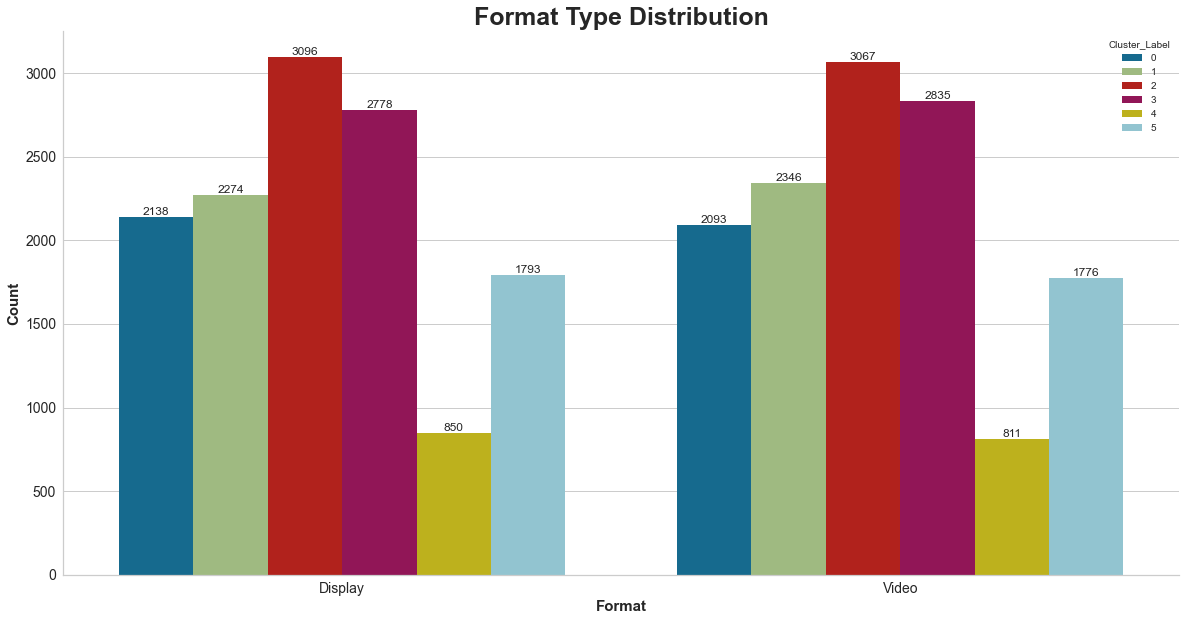

In [43]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Format Type Distribution",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()

#Plotting relevant graph using seaborn
ax = sns.countplot(data= Clust_df, hue="Cluster_Label", x= "Format");
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i],label_type="edge",fontsize= 12,rotation = 0);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0)
plt.xlabel("Format",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

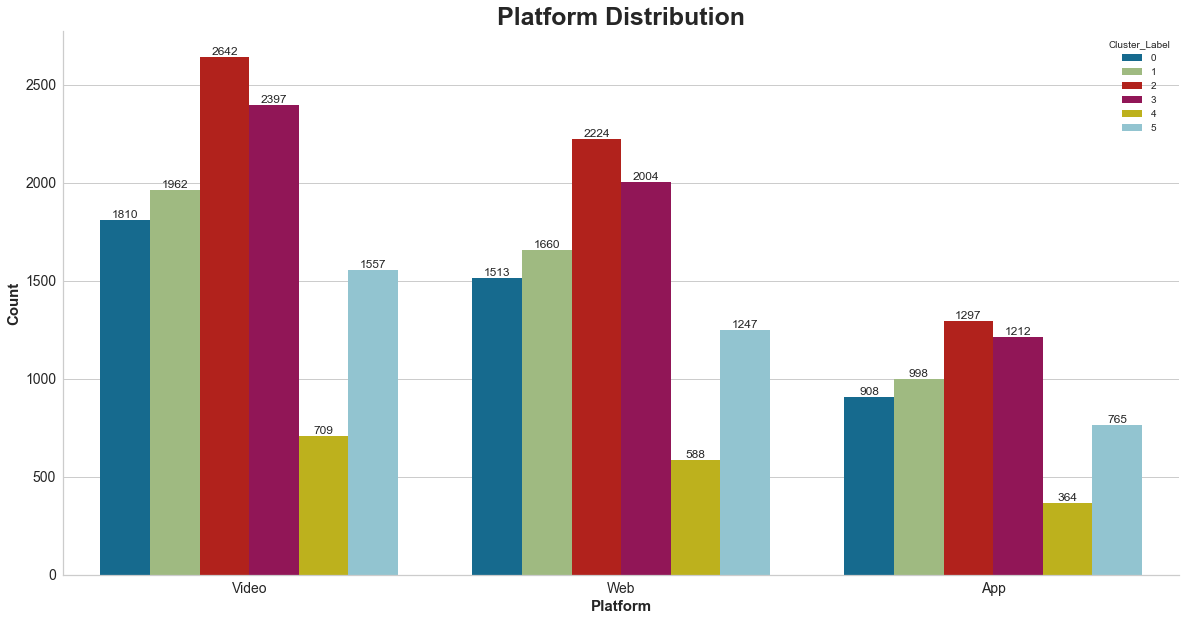

In [44]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Platform Distribution",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()

#Plotting relevant graph using seaborn
ax = sns.countplot(data= Clust_df, hue="Cluster_Label", x= "Platform");
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i],label_type="edge",fontsize= 12,rotation = 0);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0)
plt.xlabel("Platform",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

In [82]:
# 3D-Plots using plotly
fig = pnx.scatter_3d(Clust_df,x ='Clicks', y ='Spend', z = 'Revenue',color ='Cluster_Label',width=800, height=800)
fig.update(layout_coloraxis_showscale=False)       
fig.show()

In [84]:
# 3D-Plots using plotly
fig = pnx.scatter_3d(Clust_df,x ='Clicks', y ='Matched_Queries', z = 'Impressions',color ='Cluster_Label',width=800, height=800)
fig.update(layout_coloraxis_showscale=False)       
fig.show()

## PCA

### Data Dictionary

TRU1	Area Name

No_HH:	No of Household

TOT_M:	Total population Male

TOT_F:	Total population Female

M_06:	Population in the age group 0-6 Male

F_06:	Population in the age group 0-6 Female

M_SC:	Scheduled Castes population Male

F_SC:	Scheduled Castes population Female

M_ST:	Scheduled Tribes population Male

F_ST:	Scheduled Tribes population Female

M_LIT:	Literates population Male

F_LIT:	Literates population Female

M_ILL:	Illiterate Male

TOT_WORK_M:	Total Worker Population Male

TOT_WORK_F:	Total Worker Population Female

MAINWORK_M:	Main Working Population Male

MAINWORK_F:	Main Working Population Female

MAIN_CL_M:	Main Cultivator Population Male

MAIN_CL_F:	Main Cultivator Population Female

MAIN_AL_M:	Main Agricultural Labourers Population Male

MAIN_AL_F:	Main Agricultural Labourers Population Female

MAIN_HH_M:	Main Household Industries Population Male

MAIN_HH_F:	Main Household Industries Population Female

MAIN_OT_M:	Main Other Workers Population Male

MAIN_OT_F:	Main Other Workers Population Female

MARGWORK_M:	Marginal Worker Population Male

MARGWORK_F:	Marginal Worker Population Female

MARG_CL_M:	Marginal Cultivator Population Male

MARG_CL_F:	Marginal Cultivator Population Female

MARG_AL_M:	Marginal Agriculture Labourers Population Male

MARG_AL_F:	Marginal Agriculture Labourers Population Female

MARG_HH_M:	Marginal Household Industries Population Male

MARG_HH_F:	Marginal Household Industries Population Female

MARG_OT_M:	Marginal Other Workers Population Male

MARG_OT_F:	Marginal Other Workers Population Female

MARGWORK_3_6_M:	Marginal Worker Population 3-6 Male

MARGWORK_3_6_F:	Marginal Worker Population 3-6 Female

MARG_CL_3_6_M:	Marginal Cultivator Population 3-6 Male

MARG_CL_3_6_F:	Marginal Cultivator Population 3-6 Female

MARG_AL_3_6_M:	Marginal Agriculture Labourers Population 3-6 Male

MARG_AL_3_6_F:	Marginal Agriculture Labourers Population 3-6 Female

MARG_HH_3_6_M:	Marginal Household Industries Population 3-6 Male

MARG_HH_3_6_F:	Marginal Household Industries Population 3-6 Female

MARG_OT_3_6_M:	Marginal Other Workers Population Person 3-6 Male

MARG_OT_3_6_F:	Marginal Other Workers Population Person 3-6 Female

MARGWORK_0_3_M:	Marginal Worker Population 0-3 Male

MARGWORK_0_3_F:	Marginal Worker Population 0-3 Female

MARG_CL_0_3_M:	Marginal Cultivator Population 0-3 Male

MARG_CL_0_3_F:	Marginal Cultivator Population 0-3 Female

MARG_AL_0_3_M:	Marginal Agriculture Labourers Population 0-3 Male

MARG_AL_0_3_F:	Marginal Agriculture Labourers Population 0-3 Female

MARG_HH_0_3_M:	Marginal Household Industries Population 0-3 Male

MARG_HH_0_3_F:	Marginal Household Industries Population 0-3 Female

MARG_OT_0_3_M:	Marginal Other Workers Population 0-3 Male

MARG_OT_0_3_F:	Marginal Other Workers Population 0-3 Female

NON_WORK_M:	Non Working Population Male

NON_WORK_F:	Non Working Population Female


### PCA Analysis

In [46]:
pca_xls = pd.ExcelFile("PCA+India+Data_Census.xlsx")
pca_df = pd.read_excel(pca_xls,"data")
pca_df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [47]:
pca_df.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [48]:
pca_df.shape

(640, 61)

In [49]:
#The size of the dataset is:
print(f"No. of Rows: {pca_df.shape[0]}")
print(f"No. of Columns: {pca_df.shape[1]}")

No. of Rows: 640
No. of Columns: 61


In [50]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [51]:
pca_df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [52]:
pca_df.duplicated().sum()

0

In [53]:
pca_df.describe().T

count           mean            std    min       25%      50%  \
State Code     640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code      640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH          640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M          640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F          640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
...              ...            ...            ...    ...       ...      ...   
MARG_HH_0_3_F  640.0    1293.431250    1585.377936    0.0    298.00    717.0   
MARG_OT_0_3_M  640.0      71.379688     107.897627    0.0     14.00     35.0   
MARG_OT_0_3_F  640.0     200.742188     309.740854    0.0     43.00    113.0   
NON_WORK_M     640.0     510.014063     610.603187    0.0    161.00    326.0   
NON_WORK_F     640.0     704.778125     910.209225    5.0    220.50    464.5   

                     75%       max  
State Code         24.00      35.0  
Dist.Code         480.25     640.0  
No_HH           68892.00  310450.0  
TOT_M          107918.50  485417.0  
TOT_F          164251.75  750392.0  
...                  ...       ...  
MARG_HH_0_3_F    1710.75   13714.0  
MARG_OT_0_3_M      79.00     895.0  
MARG_OT_0_3_F     240.00    3354.0  
NON_WORK_M        604.50    6456.0  
NON_WORK_F        853.50   10533.0  

[59 rows x 8 columns]

In [54]:
state_profile = pca_df[["State", "TOT_M", "TOT_F"]]
state_profile.head()

State  TOT_M  TOT_F
0  Jammu & Kashmir  23388  29796
1  Jammu & Kashmir  19585  23102
2  Jammu & Kashmir   6546  10964
3  Jammu & Kashmir   2784   4206
4  Jammu & Kashmir  20591  29981

In [55]:
state_gender_r = state_profile.groupby("State").sum()
state_gender_r["Gender_ratio"] = ((state_gender_r.TOT_M)/(state_gender_r.TOT_F))
state_gender_r.style.highlight_max(color="red")


In [56]:
state_gender_r.style.highlight_min(color="Blue")

In [57]:
Dist_profile = pca_df[["Dist.Code", "TOT_M", "TOT_F"]]
Dist_profile.head()

Dist.Code  TOT_M  TOT_F
0          1  23388  29796
1          2  19585  23102
2          3   6546  10964
3          4   2784   4206
4          5  20591  29981

In [58]:
Dist_gender_r = Dist_profile.groupby("Dist.Code").sum()
Dist_gender_r["Gender_ratio"] = ((Dist_gender_r.TOT_M)/(Dist_gender_r.TOT_F))
#Dist_gender_r.style.highlight_max(color="red")

In [59]:
print(f"District Code {Dist_gender_r.Gender_ratio.idxmax()} has the highest gender ratio of {round(Dist_gender_r.Gender_ratio.max(),2)}")
print(f"District Code {Dist_gender_r.Gender_ratio.idxmin()} has the lowest gender ratio of {round(Dist_gender_r.Gender_ratio.min(),2)}");

District Code 587 has the highest gender ratio of 0.87
District Code 547 has the lowest gender ratio of 0.44


In [85]:
state_profile_lit = pca_df[["State", "M_LIT", "F_LIT"]]
state_profile_lit.head()

State  M_LIT  F_LIT
0  Jammu & Kashmir  13381  11364
1  Jammu & Kashmir  10513   7891
2  Jammu & Kashmir   4534   5840
3  Jammu & Kashmir   1842   1962
4  Jammu & Kashmir  13243  13477

In [88]:
state_literacy_r = state_profile_lit.groupby("State").sum()
state_literacy_r["Literacy_Gender_ratio"] = ((state_literacy_r.M_LIT)/(state_literacy_r.F_LIT))
state_literacy_r["Literacy_ratio_MaleTOT"] = ((state_literacy_r.M_LIT)/(state_gender_r.TOT_M)) 
state_literacy_r["Literacy_ratio_FemaleTOT"] = ((state_literacy_r.F_LIT)/(state_gender_r.TOT_F)) 
#state_gender_r.TOT_M
state_literacy_r.style.highlight_max(color="red")

In [90]:
state_literacy_r.style.highlight_min(color="Blue")

In [60]:
pca_num_df = pca_df.select_dtypes(include = ['float64', 'int64'])
All_numeric_columns = list(pca_num_df.columns.values)
len(All_numeric_columns)

59

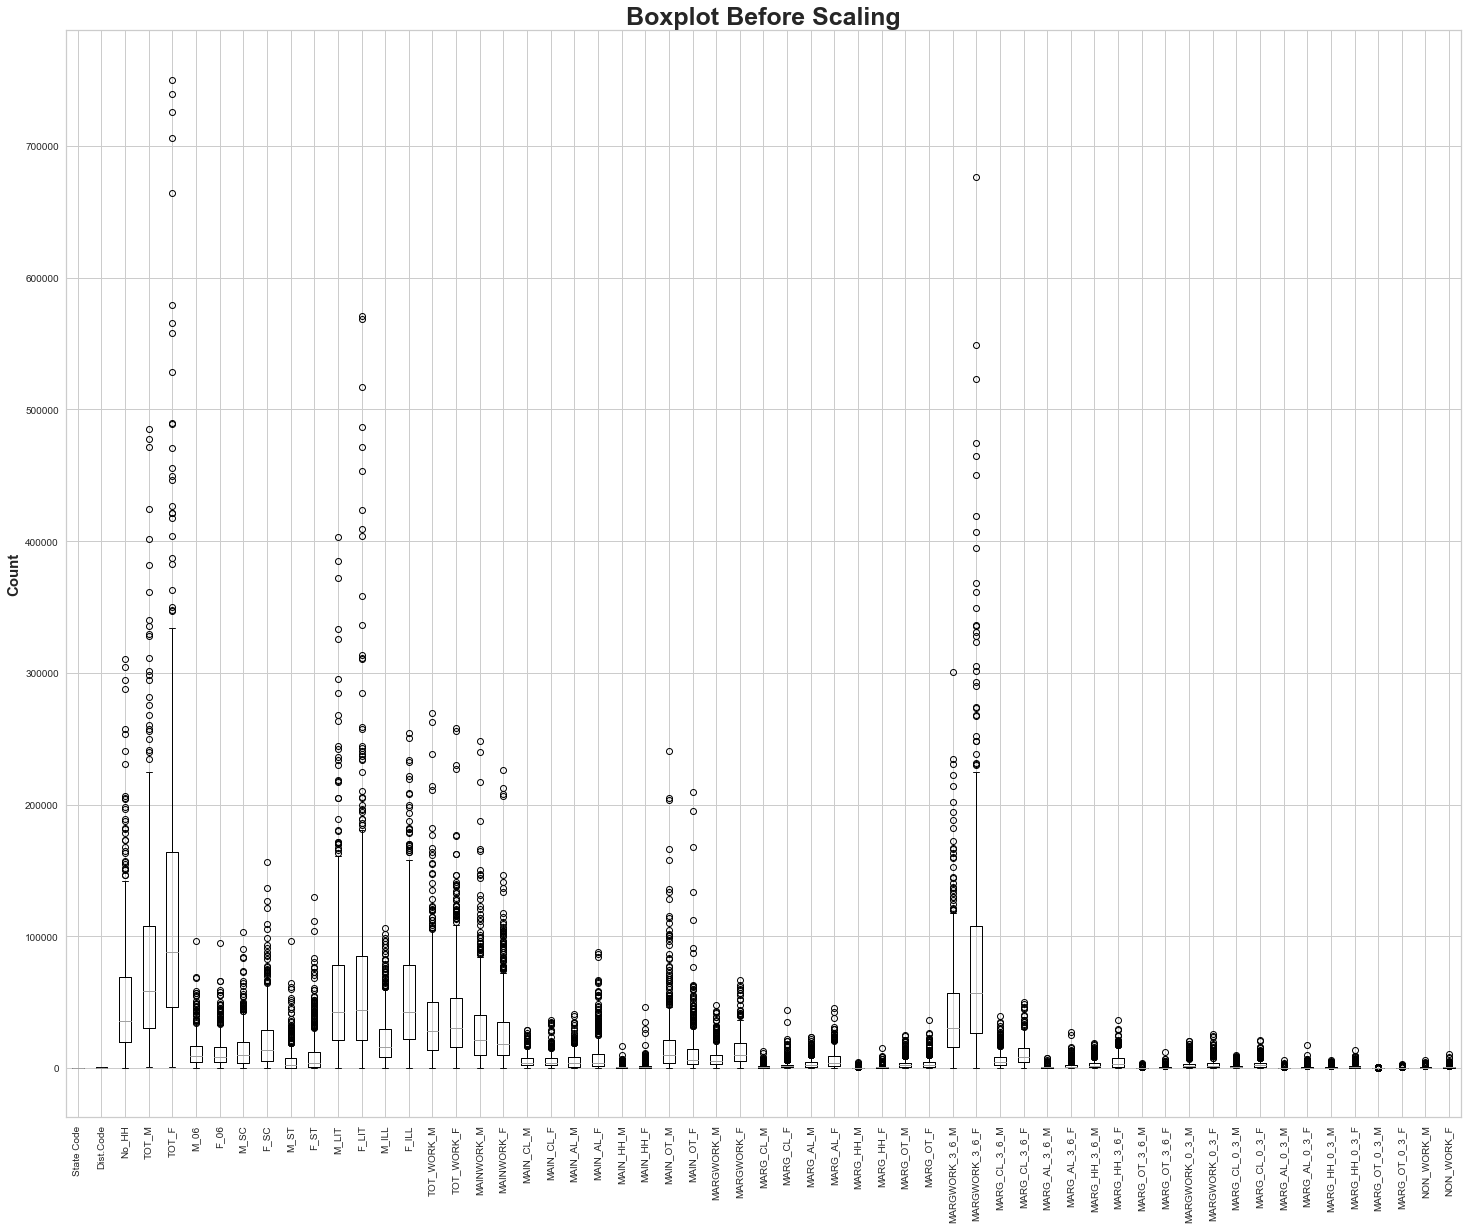

In [61]:
pca_num_df.boxplot(figsize=(25,20))
plt.title("Boxplot Before Scaling",fontsize=25, weight="bold")
plt.ylabel("Count",fontsize=15, weight="bold");
plt.xticks(rotation=90)
plt.show()

In [62]:
pca_scaled_df = pca_num_df.apply(zscore)
pca_scaled_df.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738   
1   -1.710782  -1.723934 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367   
2   -1.710782  -1.718521 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262   
3   -1.710782  -1.713109 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393   
4   -1.710782  -1.707696 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.958575 -0.957049 -0.423306  ...      -0.163229      -0.720610   
1 -0.958297 -0.956772 -0.582014  ...      -0.583103      -0.732811   
2 -0.958575 -0.956772 -0.038951  ...      -0.859212      -0.921931   
3 -0.958783 -0.957049 -0.355965  ...      -0.805468      -0.900758   
4 -0.957395 -0.955529  0.149238  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 59 columns]

In [63]:
pca_scaled_df.describe().T

count          mean       std       min       25%       50%  \
State Code     640.0 -1.121325e-15  1.000782 -1.710782 -0.861446  0.094057   
Dist.Code      640.0 -5.169476e-17  1.000782 -1.729347 -0.864673  0.000000   
No_HH          640.0  7.736867e-17  1.000782 -1.057697 -0.659882 -0.319887   
TOT_M          640.0 -1.864828e-16  1.000782 -1.084858 -0.677956 -0.294592   
TOT_F          640.0 -2.983724e-17  1.000782 -1.071906 -0.668250 -0.305233   
...              ...           ...       ...       ...       ...       ...   
MARG_HH_0_3_F  640.0 -1.247266e-16  1.000782 -0.816489 -0.628374 -0.363877   
MARG_OT_0_3_M  640.0 -2.515349e-17  1.000782 -0.662068 -0.532213 -0.337432   
MARG_OT_0_3_F  640.0 -3.053113e-17  1.000782 -0.648604 -0.509670 -0.283498   
NON_WORK_M     640.0 -5.741935e-17  1.000782 -0.835916 -0.572036 -0.301600   
NON_WORK_F     640.0 -1.994932e-17  1.000782 -0.769412 -0.532468 -0.264188   

                    75%        max  
State Code     0.731060   1.898897  
Dist.Code      0.864673   1.729347  
No_HH          0.367358   5.389586  
TOT_M          0.381549   5.529690  
TOT_F          0.368945   5.532633  
...                 ...        ...  
MARG_HH_0_3_F  0.263436   7.840581  
MARG_OT_0_3_M  0.070681   7.639320  
MARG_OT_0_3_F  0.126843  10.188272  
NON_WORK_M     0.154863   9.745505  
NON_WORK_F     0.163521  10.806207  

[59 rows x 8 columns]

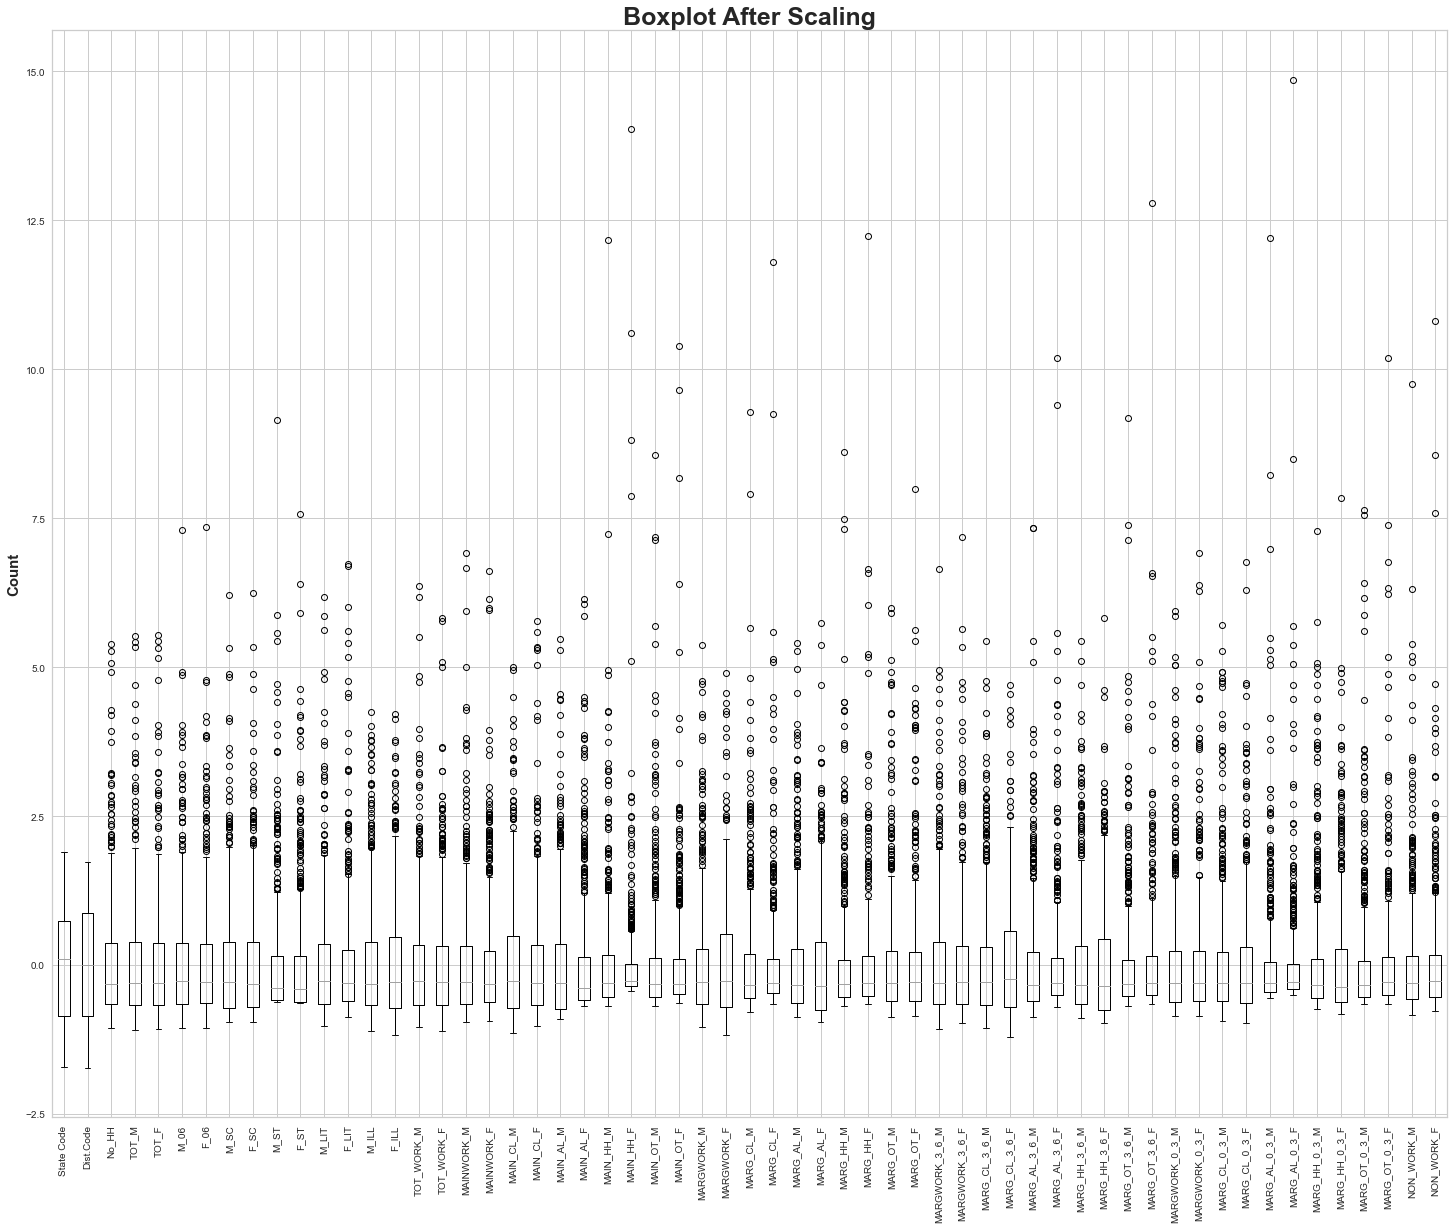

In [64]:
pca_scaled_df.boxplot(figsize=(25,20))
plt.title("Boxplot After Scaling",fontsize=25, weight="bold")
plt.ylabel("Count",fontsize=15, weight="bold");
plt.xticks(rotation=90)
plt.show()

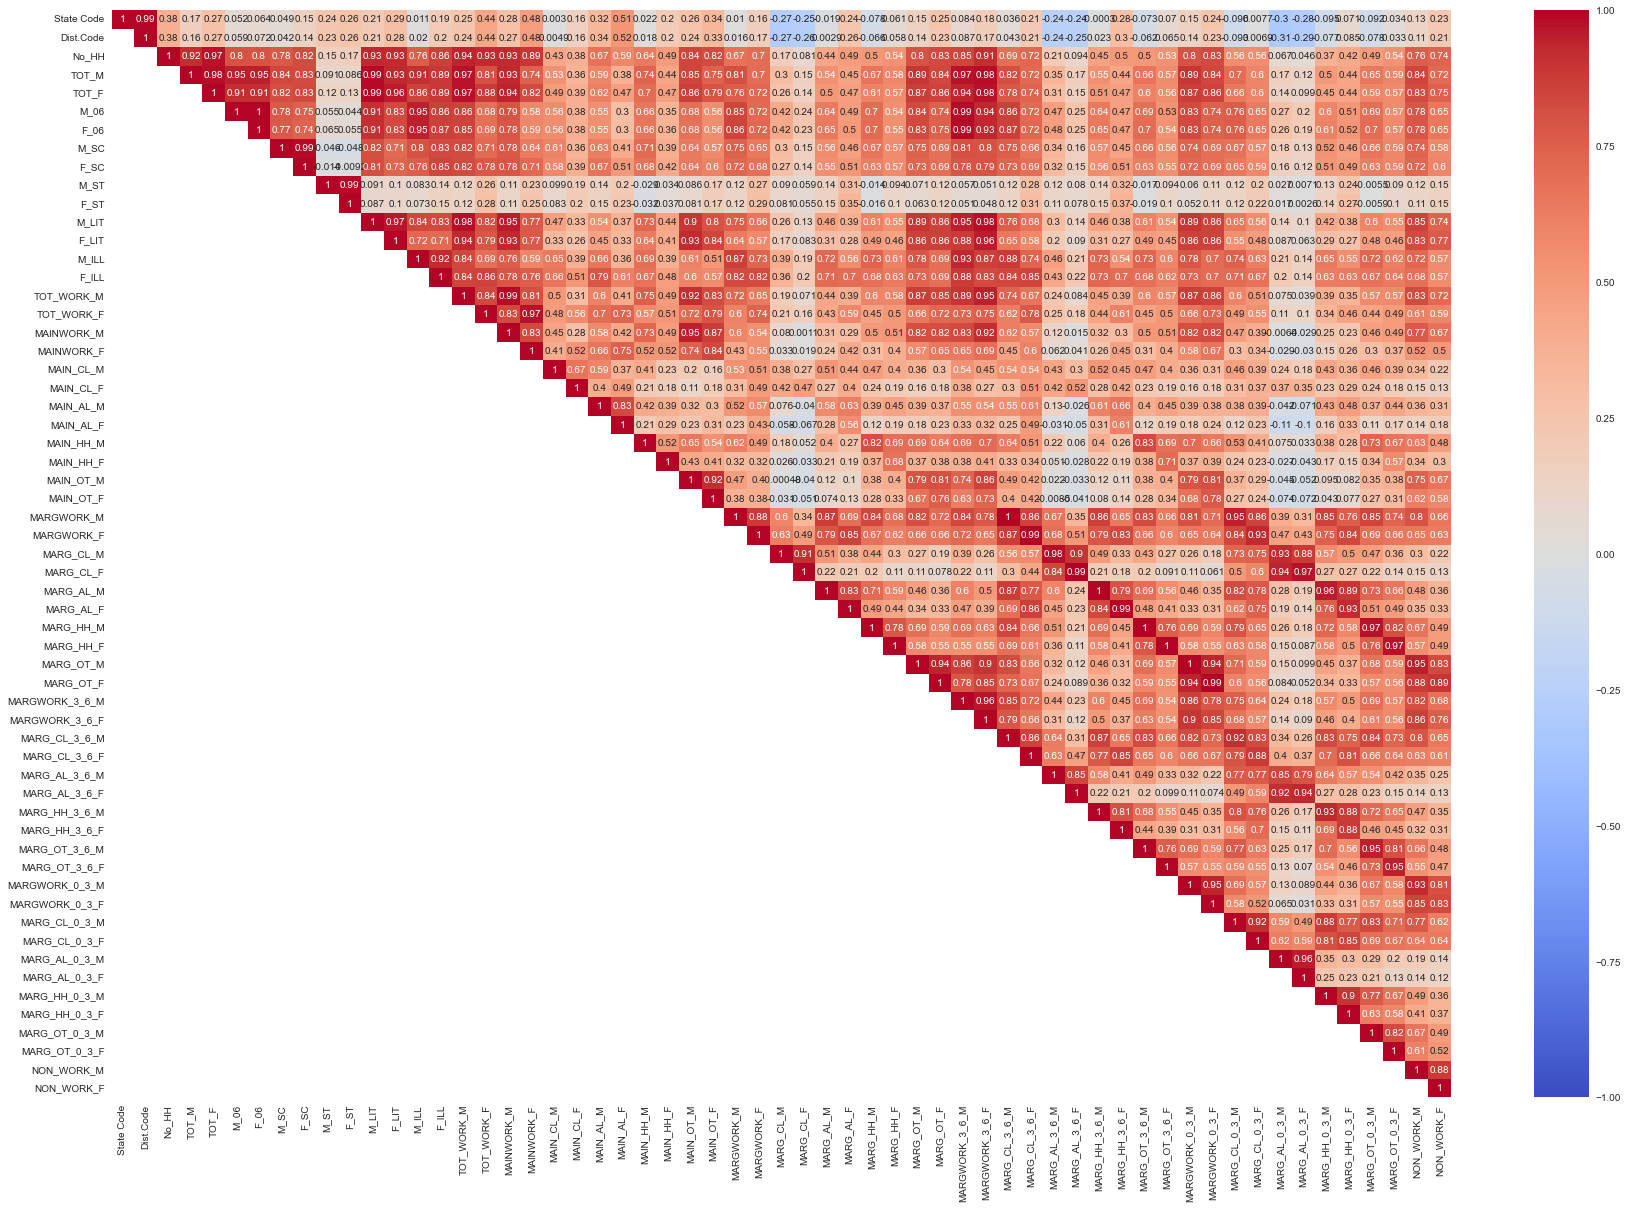

In [65]:
df_Corr = pca_num_df.corr(method='pearson')

plt.figure(figsize=(30 ,20))
mask = np.array(df_Corr)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =df_Corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

In [66]:
chi_square_value,p_value=calculate_bartlett_sphericity(pca_scaled_df)
p_value

0.0

In [67]:
kmo_all,kmo_model=calculate_kmo(pca_scaled_df)
kmo_model

0.8053442139017191

In [68]:
#get Covariance Matrix
cov_matrix = np.cov(pca_scaled_df)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 0.10020524  0.08823726  0.06693845 ... -0.06339201 -0.06778175
  -0.06952845]
 [ 0.08823726  0.115792    0.07141346 ... -0.04641798 -0.05809845
  -0.06087069]
 [ 0.06693845  0.07141346  0.08655832 ... -0.04250302 -0.04784278
  -0.05035134]
 ...
 [-0.06339201 -0.04641798 -0.04250302 ...  0.27671338  0.26825598
   0.26263806]
 [-0.06778175 -0.05809845 -0.04784278 ...  0.26825598  0.26362931
   0.25867337]
 [-0.06952845 -0.06087069 -0.05035134 ...  0.26263806  0.25867337
   0.25621339]]


In [69]:
#Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n', eig_vals)
print('\n')
print('Eigen Vectors \n', eig_vecs)


 Eigen Values 
 [ 9.45141253e+01+0.00000000e+00j  6.21702599e+01+0.00000000e+00j
  4.70548233e+01+0.00000000e+00j  2.81947653e+01+0.00000000e+00j
  2.41334102e+01+0.00000000e+00j  1.51567252e+01+0.00000000e+00j
  1.14471833e+01+0.00000000e+00j  8.18675766e+00+0.00000000e+00j
  6.84613449e+00+0.00000000e+00j  6.38327385e+00+0.00000000e+00j
  4.67322384e+00+0.00000000e+00j  3.81639128e+00+0.00000000e+00j
  3.45679604e+00+0.00000000e+00j  3.06608622e+00+0.00000000e+00j
  2.30787204e+00+0.00000000e+00j  1.73937776e+00+0.00000000e+00j
  1.36733844e+00+0.00000000e+00j  1.22857796e+00+0.00000000e+00j
  1.12132139e+00+0.00000000e+00j  1.01488189e+00+0.00000000e+00j
  8.42046524e-01+0.00000000e+00j  6.08995295e-01+0.00000000e+00j
  4.75661198e-01+0.00000000e+00j  3.93014260e-01+0.00000000e+00j
  3.24939327e-01+0.00000000e+00j  2.97296952e-01+0.00000000e+00j
  2.58244484e-01+0.00000000e+00j  1.57766009e-01+0.00000000e+00j
  1.21202189e-01+0.00000000e+00j  1.01575653e-01+0.00000000e+00j
  9.1014

In [70]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.48639109+0.00000000e+00j  47.22439806+0.00000000e+00j
  61.406639  +0.00000000e+00j  69.90449165+0.00000000e+00j
  77.17825902+0.00000000e+00j  81.74646933+0.00000000e+00j
  85.19663024+0.00000000e+00j  87.6641046 +0.00000000e+00j
  89.72751749+0.00000000e+00j  91.651425  +0.00000000e+00j
  93.05992644+0.00000000e+00j  94.21018006+0.00000000e+00j
  95.2520523 +0.00000000e+00j  96.17616529+0.00000000e+00j
  96.87175386+0.00000000e+00j  97.39599926+0.00000000e+00j
  97.80811266+0.00000000e+00j  98.1784039 +0.00000000e+00j
  98.51636819+0.00000000e+00j  98.82225181+0.00000000e+00j
  99.07604315+0.00000000e+00j  99.25959326+0.00000000e+00j
  99.40295671+0.00000000e+00j  99.52141051+0.00000000e+00j
  99.61934666+0.00000000e+00j  99.70895143+0.00000000e+00j
  99.78678587+0.00000000e+00j  99.83433627+0.00000000e+00j
  99.87086639+0.00000000e+00j  99.90148111+0.00000000e+00j
  99.92891269+0.00000000e+00j  99.95415922+0.00000000e+00j
  99.97083351+0.00000000e+

In [71]:
#PCA From sklearn
pca = PCA(n_components=11)
df_pca_m = pca.fit_transform(pca_scaled_df)
df_pca_m.transpose() # Component output

array([[-4.71938093, -4.87329665, -6.06294775, ..., -6.18034109,
        -6.10874064, -5.78130461],
       [ 0.71750418,  0.49200093,  0.23375092, ..., -1.21626611,
        -1.24897987, -1.50149133],
       [ 1.6322657 ,  1.75212655,  1.33306811, ..., -0.34610846,
        -0.27949747, -0.18613048],
       ...,
       [ 0.02091108, -0.41380475, -0.53110729, ...,  0.73530809,
         0.83342021,  0.86895362],
       [-0.02692451,  0.33931234,  0.01474389, ...,  0.39912317,
         0.30757544,  0.38294397],
       [-0.25436643, -0.38546008, -0.39169453, ...,  0.73731199,
         0.7040983 ,  0.63135149]])

In [72]:
#Eigen Vectors
pca.components_

array([[ 3.00700521e-02,  3.00751392e-02,  1.56432451e-01,
         1.67038499e-01,  1.65701886e-01,  1.61870848e-01,
         1.62266320e-01,  1.51067631e-01,  1.51483487e-01,
         2.76635864e-02,  2.86559949e-02,  1.62028968e-01,
         1.47117900e-01,  1.61354631e-01,  1.65216191e-01,
         1.59988739e-01,  1.46484663e-01,  1.46446784e-01,
         1.24700922e-01,  1.02841551e-01,  7.46387972e-02,
         1.13762012e-01,  7.47868720e-02,  1.31280497e-01,
         8.36015471e-02,  1.23789890e-01,  1.11498595e-01,
         1.64144005e-01,  1.55258801e-01,  8.14703494e-02,
         4.84108523e-02,  1.28166982e-01,  1.14462067e-01,
         1.40274353e-01,  1.27424449e-01,  1.55154856e-01,
         1.47413552e-01,  1.64714317e-01,  1.61211005e-01,
         1.65089659e-01,  1.55618244e-01,  9.21330578e-02,
         5.07812312e-02,  1.28188765e-01,  1.10910853e-01,
         1.39029295e-01,  1.24330759e-01,  1.54196780e-01,
         1.46411774e-01,  1.49444956e-01,  1.39705021e-0

In [73]:
#Eigen Values
pca.explained_variance_

array([31.86742634,  8.18907061,  4.54275124,  3.84336785,  2.27105793,
        1.95992589,  1.37548006,  0.88734267,  0.71989796,  0.61405955,
        0.49439968])

In [74]:
#Contribution of each Principal Component
pca.explained_variance_ratio_ * 100

array([53.92819235, 13.85809353,  7.68754779,  6.50400438,  3.84323628,
        3.3167178 ,  2.32767944,  1.50162068,  1.21825953,  1.03915268,
        0.83665625])

In [75]:
#Cumulative Sum
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance Explained\n", cum_var_exp)

Cumulative Variance Explained
 [0.53928192 0.67786286 0.75473834 0.81977838 0.85821074 0.89137792
 0.91465472 0.92967092 0.94185352 0.95224504 0.96061161]


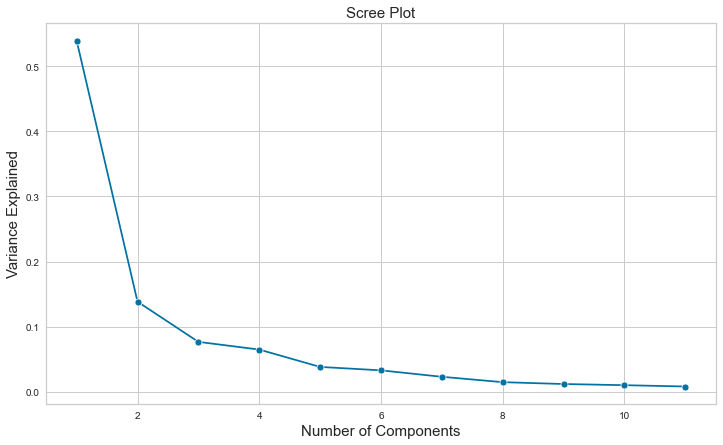

In [76]:
#Scree Plot 
plt.figure(figsize=(12,7))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,len(pca.explained_variance_ratio_)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.show()

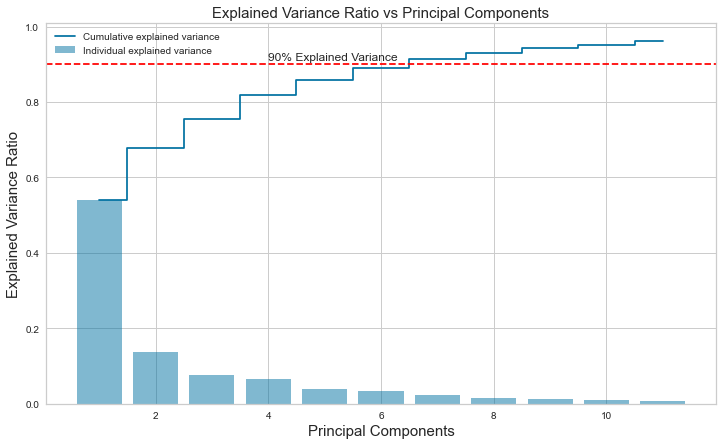

In [77]:
# Plotting Cumulative explained variance and individual explained variance vs Principal Components
plt.figure(figsize=(12 ,7))
plt.bar(range(1, pca.explained_variance_.size + 1), pca.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.axhline(y=0.9, xmax = 7 , linestyle = '--', color = 'red')
plt.text(4,0.91, "90% Explained Variance",rotation=0,fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.show()

In [78]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(pca_scaled_df))
df_pca_loading.shape

(11, 59)

In [79]:
df_pca_loading.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0    0.030070   0.030075  0.156432  0.167038  0.165702  0.161871  0.162266   
1   -0.162783  -0.158822 -0.128322 -0.080861 -0.101111 -0.012753 -0.011674   
2   -0.250129  -0.259360 -0.033498  0.063630  0.024403  0.070453  0.063515   
3    0.120049   0.110852  0.101335  0.033299  0.071948  0.007703  0.002417   
4    0.145753   0.136167 -0.022504 -0.049227 -0.027928 -0.069415 -0.062113   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0  0.151068  0.151483  0.027664  ...       0.149445       0.139705   
1 -0.035627 -0.047732  0.008893  ...       0.154508       0.174434   
2  0.035345 -0.009677 -0.201756  ...       0.057198      -0.023800   
3 -0.024603  0.002284  0.142128  ...      -0.040609       0.046423   
4 -0.185394 -0.170823  0.372538  ...       0.093749       0.140430   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0       0.051646       0.040969       0.121254       0.115790       0.139260   
1       0.253834       0.242224       0.181278       0.165403       0.093446   
2       0.149589       0.151083      -0.088656      -0.197795       0.058031   
3       0.230440       0.265749      -0.171925      -0.086789      -0.205374   
4      -0.016334      -0.017104       0.055508       0.105537       0.002041   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0       0.131869    0.150220    0.131179  
1       0.054069   -0.054410   -0.069474  
2      -0.001833    0.128955    0.086702  
3      -0.207761   -0.019155    0.037790  
4       0.055448    0.171164    0.248574  

[5 rows x 59 columns]

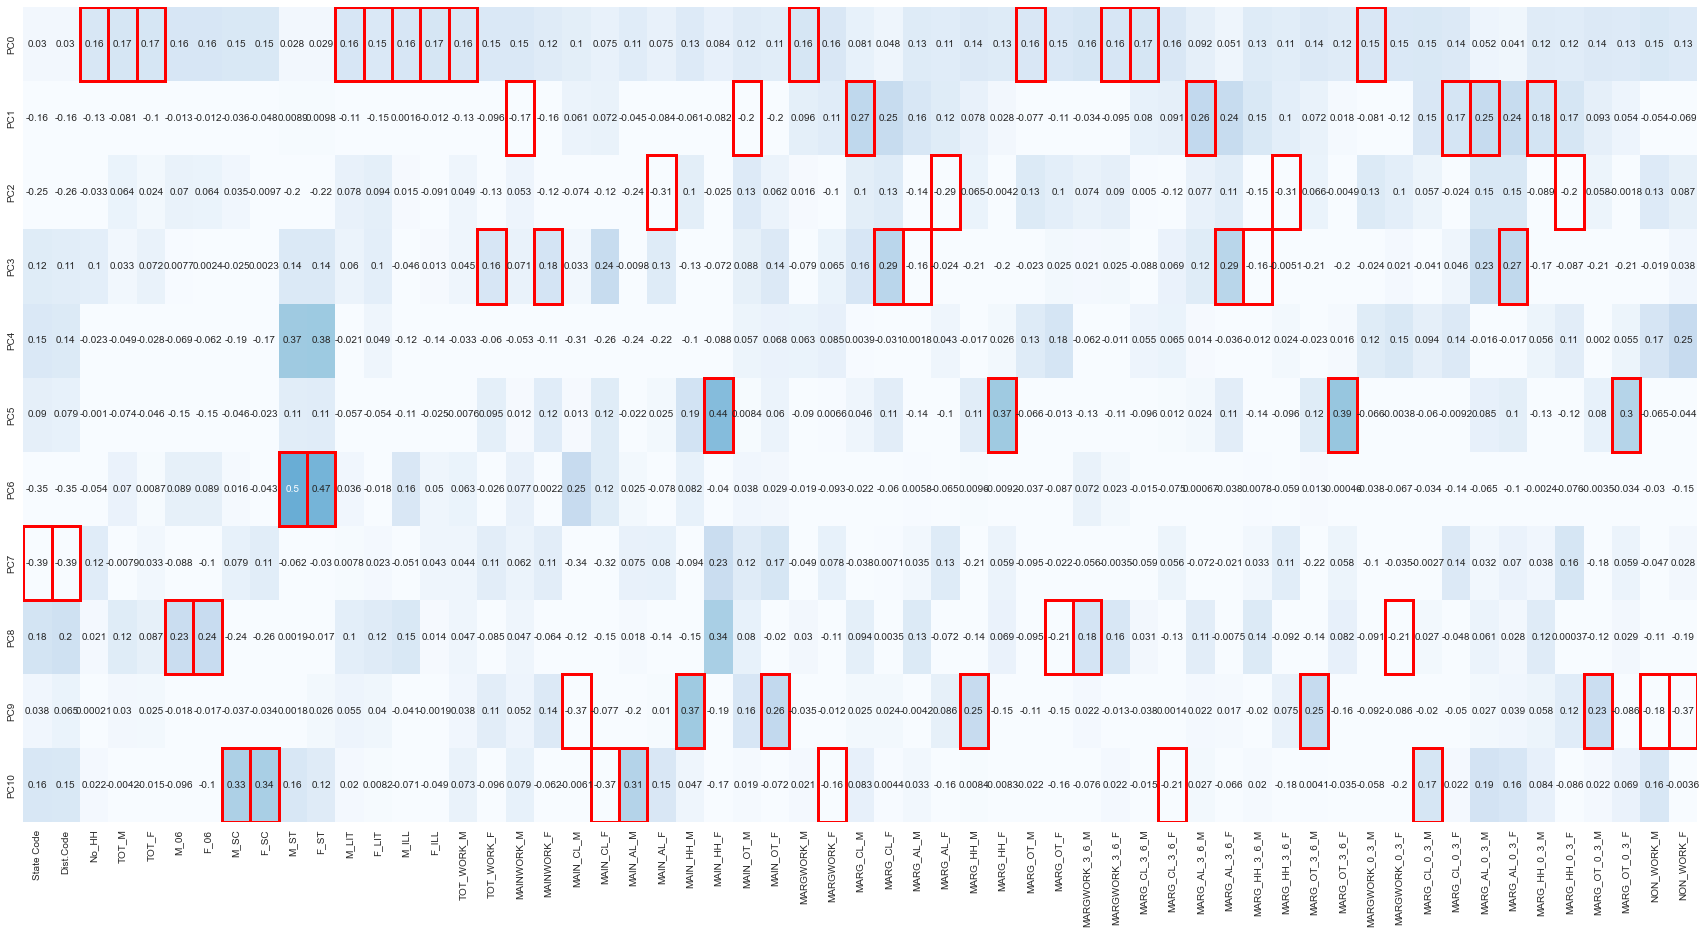

In [80]:
fig,ax = plt.subplots(figsize=(30, 15), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [81]:
#The Linear eq of 1st component
for i in range(0,pca_scaled_df.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),pca_scaled_df.columns[i]),end='  ')

0.03 * State Code  0.03 * Dist.Code  0.156 * No_HH  0.167 * TOT_M  0.166 * TOT_F  0.162 * M_06  0.162 * F_06  0.151 * M_SC  0.151 * F_SC  0.028 * M_ST  0.029 * F_ST  0.162 * M_LIT  0.147 * F_LIT  0.161 * M_ILL  0.165 * F_ILL  0.16 * TOT_WORK_M  0.146 * TOT_WORK_F  0.146 * MAINWORK_M  0.125 * MAINWORK_F  0.103 * MAIN_CL_M  0.075 * MAIN_CL_F  0.114 * MAIN_AL_M  0.075 * MAIN_AL_F  0.131 * MAIN_HH_M  0.084 * MAIN_HH_F  0.124 * MAIN_OT_M  0.111 * MAIN_OT_F  0.164 * MARGWORK_M  0.155 * MARGWORK_F  0.081 * MARG_CL_M  0.048 * MARG_CL_F  0.128 * MARG_AL_M  0.114 * MARG_AL_F  0.14 * MARG_HH_M  0.127 * MARG_HH_F  0.155 * MARG_OT_M  0.147 * MARG_OT_F  0.165 * MARGWORK_3_6_M  0.161 * MARGWORK_3_6_F  0.165 * MARG_CL_3_6_M  0.156 * MARG_CL_3_6_F  0.092 * MARG_AL_3_6_M  0.051 * MARG_AL_3_6_F  0.128 * MARG_HH_3_6_M  0.111 * MARG_HH_3_6_F  0.139 * MARG_OT_3_6_M  0.124 * MARG_OT_3_6_F  0.154 * MARGWORK_0_3_M  0.146 * MARGWORK_0_3_F  0.149 * MARG_CL_0_3_M  0.14 * MARG_CL_0_3_F  0.052 * MARG_AL_0_3_M  0.04